#**FBxM Data Retrieval - Processing SERPII**

-----
-----
-----

v0.3a (update 28012024) -- prototype -- Python 3.10.12
<br>
https://github.com/is004/FBxM.git

In [5]:
sampledatapath = 'https://github.com/is004/FBxM/blob/65ab3f2015b5d610c49e7eab28b5faabf3229e6c/DATASET/SERP2_After_2023-06-30_Before_2023-11-03.csv?raw=true'
# Data collection notes:
# GSE settings: Results language: Bahasa Indonesia; Display language: English
# Search URL: https://www.google.com/search?q=site%3Anews.maranatha.edu+after%3A2023-06-30+before%3A2023-11-03

In [1]:
!python --version

Python 3.10.12


In [2]:
import pandas as pd

In [4]:
pd.options.display.max_colwidth = 200
#pd.options.display.max_rows = 200

#A. DATA RETRIEVAL & PREPROCESSING
-----
-----

In [6]:
dataread = pd.read_csv(sampledatapath)

In [7]:
dataread.head()

,Position,Organic Position,Searchquery,Device,Title,Description,Pixeldistance from top,Snippet Pixel Height,URL,domain,...,URL Preview,Custom Favicon,Title truncated,Description truncated,Has sitelinks,Has rich results,Has image,location,date,time
0,1,-,site:news.maranatha.edu,desktop,SERP Feature | Images for site:news.maranatha.edu,-,182,226,-,-,...,-,-,-,-,-,-,-,"Indonesia Sukasari, Bandung City, West Java",11/3/2023,13:29
1,2,1,site:news.maranatha.edu,desktop,Maranatha News - Berita Resmi Universitas Kristen Maranatha,8 hours ago — Popular News · Mengakhiri Tahun 2022 dengan Ucapan Syukur di End Year Festive 2022 9 January 2023 947 · Maranatha THE Impact Rankings 2023 · Motor Listrik ...,452,117,https://news.maranatha.edu/,news.maranatha.edu,...,https://news.maranatha.edu,no,FALSE,TRUE,FALSE,FALSE,FALSE,"Indonesia Sukasari, Bandung City, West Java",11/3/2023,13:29
2,3,2,site:news.maranatha.edu,desktop,Magazine Archive - Maranatha News,3 days ago — Maranatha News · Share: · Share:.,599,95,https://news.maranatha.edu/magazine/,news.maranatha.edu,...,https://news.maranatha.edu › magaz...,no,FALSE,FALSE,FALSE,FALSE,FALSE,"Indonesia Sukasari, Bandung City, West Java",11/3/2023,13:29
3,4,3,site:news.maranatha.edu,desktop,Featured Archive - Maranatha News,"Oct 7, 2023 — Marak Layoff, Masihkah Perusahaan Start-Up Menjanjikan bagi Fresh Graduate? 25 September 2023. 225. Ingat dengan drama ...",724,117,https://news.maranatha.edu/featured/,news.maranatha.edu,...,https://news.maranatha.edu › featured,no,FALSE,TRUE,FALSE,FALSE,FALSE,"Indonesia Sukasari, Bandung City, West Java",11/3/2023,13:29
4,5,4,site:news.maranatha.edu,desktop,Contact - Maranatha News,2 days ago — Share: · Name · Email · Subject · Message *.,871,95,https://news.maranatha.edu/contact/,news.maranatha.edu,...,https://news.maranatha.edu › contact,no,FALSE,FALSE,FALSE,FALSE,FALSE,"Indonesia Sukasari, Bandung City, West Java",11/3/2023,13:29


In [8]:
dataserp = dataread['Title'] + ' - ' + dataread['Description']
# Seleksi ambil hanya kolom Title dan Description (gabungkan)

In [9]:
dataserp.head(30)

0                                                                                                                                                       SERP Feature | Images for site:news.maranatha.edu - -
1     Maranatha News - Berita Resmi Universitas Kristen Maranatha - 8 hours ago — Popular News · Mengakhiri Tahun 2022 dengan Ucapan Syukur di End Year Festive 2022 9 January 2023 947 · Maranatha THE Im...
2                                                                                                                          Magazine Archive - Maranatha News - 3 days ago — Maranatha News · Share: · Share:.
3                                Featured Archive - Maranatha News - Oct 7, 2023 — Marak Layoff, Masihkah Perusahaan Start-Up Menjanjikan bagi Fresh Graduate? 25 September 2023. 225. Ingat dengan drama ...
4                                                                                                                        Contact - Maranatha News - 2 days ago — Share: · Name ·

Catatan: Masih ada banyak noise: teks tanggal dan bulan, days ago, label menu (share: tags: related news:). Perlu cleaning dengan pengolahan string pada dataframe dan selanjutnya dengan cara menambah dictionary stopwords spesifik. Noise ini adalah noise yang khas dan akan selalu ada di hasil SERP Maranatha News.

#EDA: lihat frekuensi kata

In [10]:
import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Plot most frequent term (dari list string)
def freq_words(x, terms):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # Select top n most frequent words
  d = words_df.nlargest(columns = "count", n = terms)
  plt.figure(figsize=(20,5))
  plt.rcParams['font.size'] = 12
  locs, labels = plt.xticks()
  plt.setp(labels, rotation=90)
  ax = sns.barplot(data = d, x = "word", y = "count", hue = "word")
  ax.set(ylabel = 'Term Counts')
  ax.set(xlabel = 'Top Terms')
  plt.show()

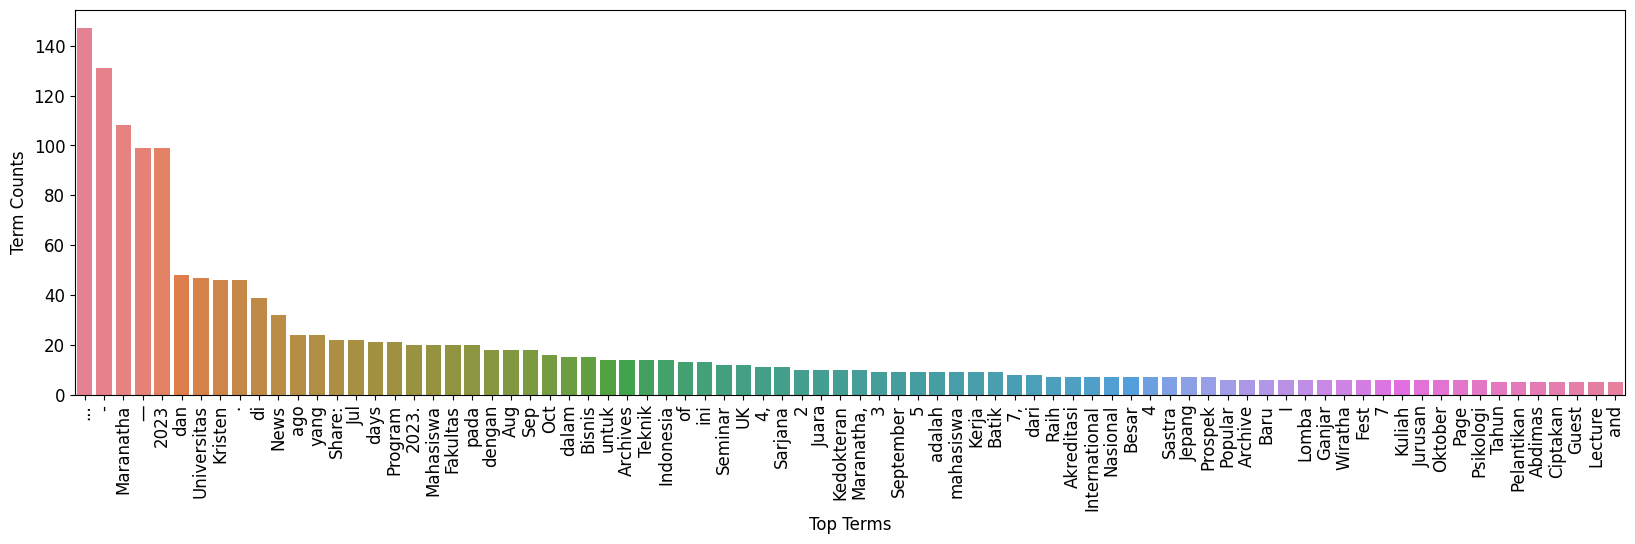

In [ ]:
# Lihat frekuensi kata (top 80)
freq_words(dataserp, terms=80)

#Precleaning
Cleaning pada level dataset mentah

In [11]:
hapuskata = ['Berita Resmi Universitas', 'Archive - Maranatha News', 'Archives - Maranatha News', 'Popular News - Maranatha News', 'Contact - Maranatha News',
             'Popular News', 'Popular Tags', 'Editor Pick', 'Untitled',
             'Archive - Page', 'Archives - Page', 'Kata Kunci - Maranatha News', 'Hasil Pencarian', 'Related Photo', 'More News', 'SERP Feature']
# List daftar kata berisi string tags navigasi dan penanda khas halaman website Maranatha News yang tidak berkontribusi makna pada pemodelan topik
# "SERP Feature" digenerate oleh Google Search Engine, yaitu hasil tambahan yang tidak dibutuhkan pada pemodelan topik

dataserp_preclean = dataserp[~dataserp.str.contains('|'.join(hapuskata))].reset_index(drop=True)
# Drop rows series mengandung partial string list [hapuskata] pada kolom 'Title'; dan reset index

In [12]:
dataserp_preclean.shape

(72,)

In [13]:
dataserp_preclean.head(30)

0     Belajar dari Ganjar - Maranatha News - Oct 16, 2023 — Ganjar tahu persis, mengupayakan keadilan dan kesejahteraan untuk semua adalah sebuah tantangan sekaligus harapan. Sebab, ada masalah dalam ha...
1     Semnas “Road to Unggul” (Foto, Video, Materi) - Aug 23, 2023 — Seminar Nasional “Road to Unggul” Universitas Kristen Maranatha berkolaborasi dengan Lembaga Layanan Pendidikan Tinggi (LLDIKTI) Wila...
2     Kedokteran Maranatha Terakreditasi Internasional ASIIN - Aug 4, 2023 — Program Sarjana Kedokteran dan Profesi Dokter Universitas Kristen Maranatha menerima sertifikat akreditasi internasional ASII...
3     Pelantikan Mahasiswa Baru 2023/2024 - Maranatha News - Sep 16, 2023 — Sidang Terbuka Senat Universitas Kristen Maranatha dalam Rangka Pelantikan Mahasiswa Baru dan Pembukaan Tahun Akademik 2023/20...
4     Semnas "Kepemimpinan Transformasional" Ganjar Pranowo - Oct 11, 2023 — Universitas Kristen Maranatha menyelenggarakan Seminar Nasional 'Kepemimpinan Transformasional yang

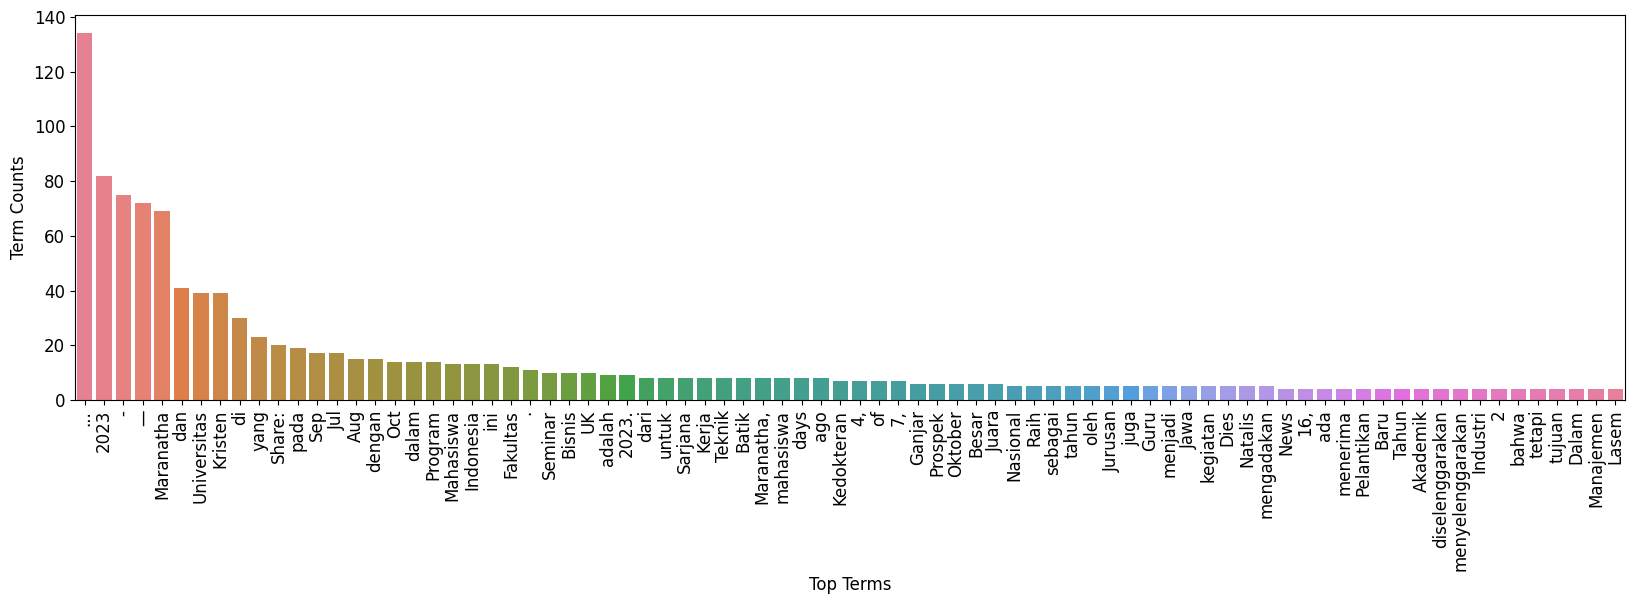

In [ ]:
# Lihat frekuensi kata
freq_words(dataserp_preclean, terms=80)

#Preprocessing & cleaning tahap I

In [ ]:
import nltk
nltk.download('stopwords') # Stopwords dictionary files
nltk.download('punkt') # Tokenizer
from nltk import word_tokenize, sent_tokenize # Tokenisasi
from nltk.corpus import stopwords
import re, string, unicodedata  # Regular expression

In [15]:
# Cleaning remove punctuation, number, karakter khusus, lowercasing, dst.
def cleaning(str):
    # remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    # remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    # remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    # remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    # lowercasing
    str = str.lower()
    # Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
    return str

# Remove short sentence which contains only n word or less
def removeShortSentence(str):
    n = 8
    word = str.split()
    wordCount = len(word)
    if(wordCount <= n):
        str = ''
    return str

# Remove word contains only 2 letter
# Untuk menghapus singkatan nama dan gelar 2 huruf (gelar 3 huruf tidak dihapus karena bisa menghapus kata bermakna)
def removeWord(str, threshold = 2):
    threshold = threshold
    words = word_tokenize(str)
    str = ' '.join([w for w in words if len(w) > threshold])
    return str

# Remove stopword
def removeStopword(str):
    # stop_words = set(stopwords.words('indonesian')) # Syntax bila ingin menggunakan stopwords dictionary (file txt) custom -- ganti 'indonesian' dengan file custom
    stop_words = nltk.corpus.stopwords.words('indonesian') # Load dictionary bahasa Indonesia
    stop_words_2 = nltk.corpus.stopwords.words('english') # Load dictionary bahasa Inggris
    stop_words.extend(stop_words_2) # Gabungkan dictionary bahasa Inggis dan bahasa Indonesia
    # Menambahkan list custom stopwords (domain specific): kata-kata yang sering muncul tetapi tidak diperlukan sebagai topik
    custom_stopwords = ['day', 'days', 'ago', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec',
                        'bulan', 'januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember',
                        'tanggal', 'hari', 'senin', 'selasa', 'rabu', 'kamis', 'jumat', 'sabtu', 'minggu',
                        'uk', 'universitas', 'kristen', 'maranatha', 'news', 'i', 'ii', 'iii', 'iv',
                        'mengadakan', 'adakan', 'menggelar', 'digelar', 'menyelenggarakan', 'selenggarakan', 'diselenggarakan',
                        'gedung', 'ruang', 'kampus', 'bertempat', 'kali', 'bandung', 'civitas', 'academica', 'segenap',
                        'share']
    stop_words.extend(custom_stopwords) # Gabungkan custom stopwords

    exclude_stopwords = ['sama', 'umum', 'besar', 'wong']
    # Exclude kata dari daftar kata default NLTK Indonesian dictionary (kata "sama" dibutuhkan untuk membentuk frase "kerja sama"; "besar" -- "guru besar"; "umum" -- "kuliah-umum")
    final_stopwords = set([w for w in stop_words if w not in exclude_stopwords])

    # NB: Daftar kata stopwords yang ditambah dan dikurangi ditentukan berdasarkan EDA awal dan pengamatan hasil topik yang dihasilkan melalui eksperimen iterasi topic modeling

    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in final_stopwords]
    return ' '.join(filtered_sentence)

# All preprocessing pipeline
def preprocessing(str):
    str = cleaning(str)
    str = removeShortSentence(str)
    str = removeWord(str)
    str = removeStopword(str)
    return str

In [16]:
dataserp_clean = dataserp_preclean.apply(preprocessing).drop_duplicates().reset_index(drop=True) # Hapus row series yang duplikat (bila ada)
dataserp_clean = dataserp_clean[dataserp_clean != ''].reset_index(drop=True) # Drop empty rows (bila ada)

In [17]:
dataserp_clean.head(30)

0                                                                                        belajar ganjar ganjar persis mengupayakan keadilan kesejahteraan tantangan harapan regulasi
1                                                     semnas road unggul foto video materi seminar nasional road unggul berkolaborasi lembaga layanan pendidikan lldikti wilayah ban
2                               kedokteran terakreditasi internasional asiin program sarjana kedokteran profesi dokter menerima sertifikat akreditasi internasional asiin tertanggal
3                                                                                           pelantikan mahasiswa sidang terbuka senat rangka pelantikan mahasiswa pembukaan akademik
4                                     semnas kepemimpinan transformasional ganjar pranowo seminar nasional kepemimpinan transformasional menyejahterakan wong cilik pembicara ganjar
5                                     penelitian dosen raih hibah kemendikbudristek sepuluh pen

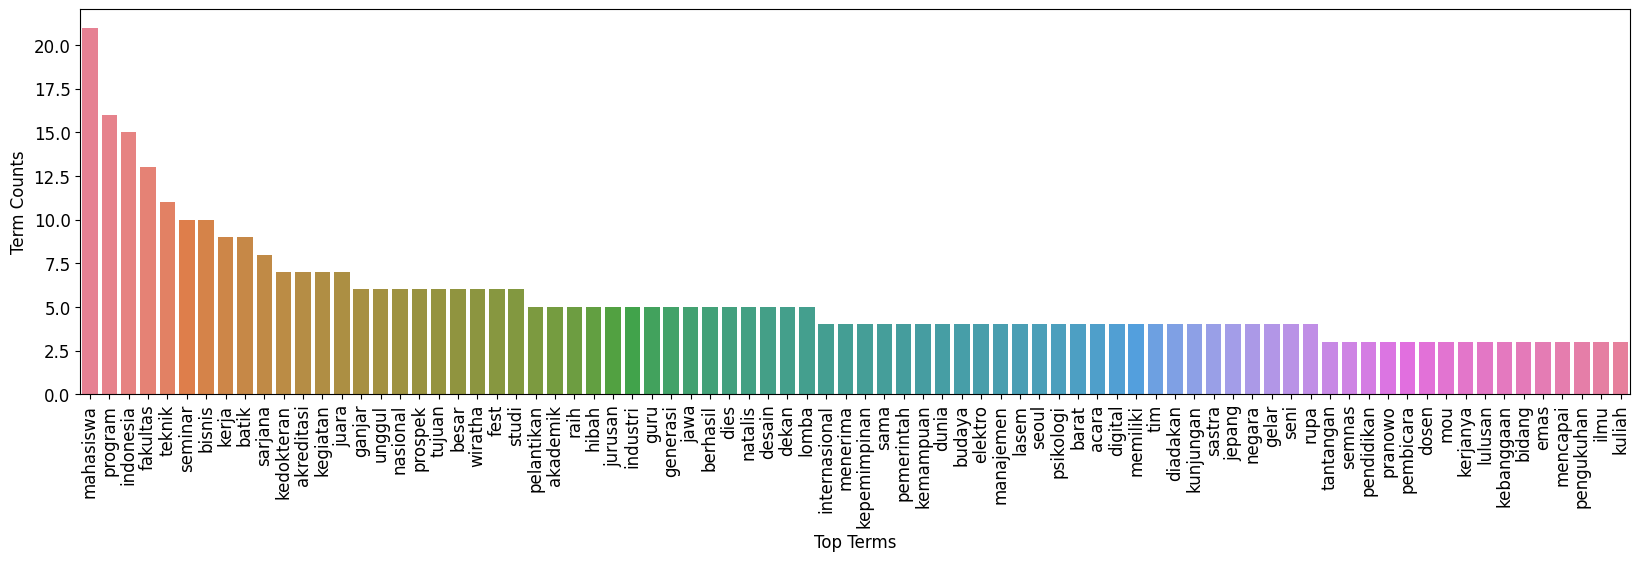

In [ ]:
# Lihat frekuensi kata
freq_words(dataserp_clean, terms=80)

#Text list unigram

In [18]:
# split sentences menjadi list of text
text_list =  [i.split() for i in dataserp_clean]

In [ ]:
text_list[0:3]

[['belajar',
  'ganjar',
  'ganjar',
  'persis',
  'mengupayakan',
  'keadilan',
  'kesejahteraan',
  'tantangan',
  'harapan',
  'regulasi'],
 ['semnas',
  'road',
  'unggul',
  'foto',
  'video',
  'materi',
  'seminar',
  'nasional',
  'road',
  'unggul',
  'berkolaborasi',
  'lembaga',
  'layanan',
  'pendidikan',
  'lldikti',
  'wilayah',
  'ban'],
 ['kedokteran',
  'terakreditasi',
  'internasional',
  'asiin',
  'program',
  'sarjana',
  'kedokteran',
  'profesi',
  'dokter',
  'menerima',
  'sertifikat',
  'akreditasi',
  'internasional',
  'asiin',
  'tertanggal']]

In [35]:
# Hitung jumlah teks
def get_all_elements(list):
    count = 0
    for element in list:
        count += len(element)
    return count

In [36]:
print("Total jumlah teks unigram: ", get_all_elements(text_list))

Total jumlah teks unigram:  1126


#Checkpoint: save corpus unigram

In [21]:
import pickle

In [23]:
#Save list to pickle
pklpath = 'DATASAVE/SERP2_corpus_unigram.pkl'
savedata = text_list
with open(pklpath, 'wb') as f:
  pickle.dump(savedata, f)

In [ ]:
#Load list from pickle
pklpath = 'DATASAVE/SERP2_corpus_unigram.pkl'
with open(pklpath, 'rb') as f:
  text_list = pickle.load(f)

#Bigram & trigram

In [24]:
import gensim
from gensim.models import Phrases # Bigram & trigram model

In [25]:
# Build bigram and trigram models (high threshold)
bigram_high = gensim.models.Phrases(text_list, min_count=2, threshold=80)
trigram_high = gensim.models.Phrases(bigram_high[text_list], min_count=1, threshold=360)
# Min_count = minimal appear in document; higher threshold fewer phrases
# Parameter min_count dan threshold ditentukan berdasarkan pengamatan bigram & trigram yang berhasil terbentuk (make sense) melalui iterasi eksperimen (parameter paling loose sampai paling tight)

# Form bigrams & trigrams
def make_bigrams(texts):
    return [bigram_high[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_high[bigram_high[doc]] for doc in texts]

In [26]:
text_list_trigrams_high = make_trigrams(text_list)

In [27]:
text_list_trigrams_high[0:3]

[['belajar',
  'ganjar',
  'ganjar',
  'persis',
  'mengupayakan',
  'keadilan',
  'kesejahteraan',
  'tantangan',
  'harapan',
  'regulasi'],
 ['semnas',
  'road',
  'unggul',
  'foto',
  'video',
  'materi',
  'seminar',
  'nasional',
  'road',
  'unggul',
  'berkolaborasi',
  'lembaga',
  'layanan',
  'pendidikan',
  'lldikti',
  'wilayah',
  'ban'],
 ['kedokteran',
  'terakreditasi',
  'internasional',
  'asiin',
  'program',
  'sarjana',
  'kedokteran',
  'profesi',
  'dokter',
  'menerima',
  'sertifikat',
  'akreditasi',
  'internasional',
  'asiin',
  'tertanggal']]

In [37]:
print("Total jumlah teks trigram: ", get_all_elements(text_list_trigrams_high))

Total jumlah teks trigram:  1044


#Checkpoint: save corpus trigram

In [29]:
#Save list to pickle
pklpath = 'DATASAVE/SERP2_corpus_trigram.pkl'
savedata = text_list_trigrams_high
with open(pklpath, 'wb') as f:
  pickle.dump(savedata, f)

In [30]:
#Load list from pickle
pklpath = 'DATASAVE/SERP2_corpus_trigram.pkl'
with open(pklpath, 'rb') as f:
  text_list_trigrams_high = pickle.load(f)

#Lihat frekuensi kata trigram

In [ ]:
# Lihat frekuensi kata trigram (dari list token)
def freq_words_trigram(x, terms):
  all_words = pd.Series(x)
  all_words = all_words.explode()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # Select top n most frequent words
  d = words_df.nlargest(columns = "count", n = terms)
  plt.figure(figsize=(20,5))
  plt.rcParams['font.size'] = 12
  locs, labels = plt.xticks()
  plt.setp(labels, rotation=90)
  ax = sns.barplot(data = d, x = "word", y = "count", hue = "word")
  ax.set(ylabel = 'Term Counts')
  ax.set(xlabel = 'Top Terms')
  plt.show()

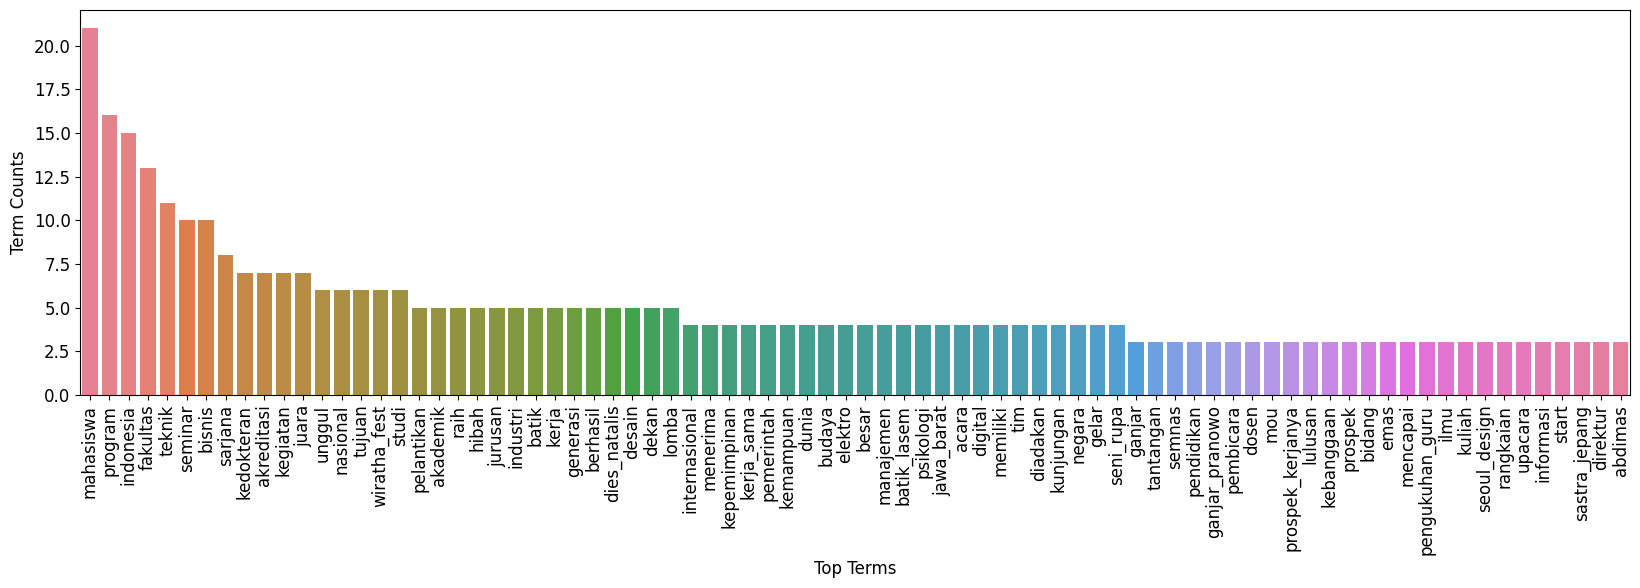

In [ ]:
freq_words_trigram(text_list_trigrams_high, terms=80)

-----

# Preprocessing tahap II unigram
Evaluation & low value filtering using TF-IDF pada corpus unigram

In [31]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
import numpy as np

In [32]:
from warnings import filterwarnings # Suppress warnings
filterwarnings('ignore')

In [33]:
# Create dictionary & corpus
dictionary_unigram = Dictionary(text_list)
corpus_unigram = [dictionary_unigram.doc2bow(text) for text in text_list]

print(dictionary_unigram)
print(corpus_unigram)

Dictionary<621 unique tokens: ['belajar', 'ganjar', 'harapan', 'keadilan', 'kesejahteraan']...>
[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1)], [(24, 1), (25, 2), (26, 1), (27, 2), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)], [(36, 1), (37, 2), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1)], [(1, 2), (16, 1), (19, 1), (20, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1)], [(51, 1), (52, 2), (53, 3), (54, 2), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)], [(62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 2), (73, 1)], [(74, 1), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 2)], [(89, 1), (90, 4), (91, 2), (92, 1), (93, 2), (94, 1), (95, 2

In [38]:
# Cek isi corpus
print("Total number of elements in corpus bow: ", get_all_elements(corpus_unigram))
limit = 5
for doc in corpus_unigram[0:limit]:
   print([[dictionary_unigram[id], freq] for id, freq in doc])

Total number of elements in corpus bow:  926
[['belajar', 1], ['ganjar', 2], ['harapan', 1], ['keadilan', 1], ['kesejahteraan', 1], ['mengupayakan', 1], ['persis', 1], ['regulasi', 1], ['tantangan', 1]]
[['ban', 1], ['berkolaborasi', 1], ['foto', 1], ['layanan', 1], ['lembaga', 1], ['lldikti', 1], ['materi', 1], ['nasional', 1], ['pendidikan', 1], ['road', 2], ['seminar', 1], ['semnas', 1], ['unggul', 2], ['video', 1], ['wilayah', 1]]
[['akreditasi', 1], ['asiin', 2], ['dokter', 1], ['internasional', 2], ['kedokteran', 2], ['menerima', 1], ['profesi', 1], ['program', 1], ['sarjana', 1], ['sertifikat', 1], ['terakreditasi', 1], ['tertanggal', 1]]
[['akademik', 1], ['mahasiswa', 2], ['pelantikan', 2], ['pembukaan', 1], ['rangka', 1], ['senat', 1], ['sidang', 1], ['terbuka', 1]]
[['ganjar', 2], ['nasional', 1], ['seminar', 1], ['semnas', 1], ['cilik', 1], ['kepemimpinan', 2], ['menyejahterakan', 1], ['pembicara', 1], ['pranowo', 1], ['transformasional', 2], ['wong', 1]]


In [39]:
# Buat document terms matrix TF-IDF
tf_idf_unigram = TfidfModel(corpus_unigram, normalize = True, smartirs='ntc') # Fit TF-IDF model
tf_idf_corpus_unigram = tf_idf_unigram[corpus_unigram] # Apply TF-IDF model

In [40]:
# Lihat corpus TF-IDF dan weight
print("Total number of elements in corpus tf_idf: ", get_all_elements(tf_idf_corpus_unigram))
limit = 5
for doc in tf_idf_corpus_unigram[0:limit]:
   print([[dictionary_unigram[id], np.around(freq, decimals=2)] for id, freq in doc])

Total number of elements in corpus tf_idf:  926
[['belajar', 0.33], ['ganjar', 0.49], ['harapan', 0.28], ['keadilan', 0.33], ['kesejahteraan', 0.28], ['mengupayakan', 0.33], ['persis', 0.33], ['regulasi', 0.33], ['tantangan', 0.25]]
[['ban', 0.25], ['berkolaborasi', 0.21], ['foto', 0.25], ['layanan', 0.25], ['lembaga', 0.21], ['lldikti', 0.25], ['materi', 0.21], ['nasional', 0.16], ['pendidikan', 0.19], ['road', 0.5], ['seminar', 0.14], ['semnas', 0.19], ['unggul', 0.34], ['video', 0.25], ['wilayah', 0.25]]
[['akreditasi', 0.18], ['asiin', 0.54], ['dokter', 0.23], ['internasional', 0.4], ['kedokteran', 0.34], ['menerima', 0.18], ['profesi', 0.27], ['program', 0.1], ['sarjana', 0.14], ['sertifikat', 0.27], ['terakreditasi', 0.27], ['tertanggal', 0.27]]
[['akademik', 0.25], ['mahasiswa', 0.27], ['pelantikan', 0.61], ['pembukaan', 0.36], ['rangka', 0.3], ['senat', 0.3], ['sidang', 0.3], ['terbuka', 0.3]]
[['ganjar', 0.4], ['nasional', 0.17], ['seminar', 0.15], ['semnas', 0.2], ['cilik', 0

#Visualisasi DTM Unigram


In [103]:
list_of_dtm_unigram = []
for doc in tf_idf_corpus_unigram:
   list_of_dtm_unigram.append([[dictionary_unigram[id], np.around(freq, decimals=2)] for id, freq in doc])

#Plot 5 dokumen

In [104]:
df_dtm_unigram_doc0 = pd.DataFrame(list_of_dtm_unigram[0], columns = ['terms', 'tf_idf'])
df_dtm_unigram_doc1 = pd.DataFrame(list_of_dtm_unigram[1], columns = ['terms', 'tf_idf'])
df_dtm_unigram_doc2 = pd.DataFrame(list_of_dtm_unigram[2], columns = ['terms', 'tf_idf'])
df_dtm_unigram_doc3 = pd.DataFrame(list_of_dtm_unigram[3], columns = ['terms', 'tf_idf'])
df_dtm_unigram_doc4 = pd.DataFrame(list_of_dtm_unigram[4], columns = ['terms', 'tf_idf'])
df_dtm_unigram_doc5 = pd.DataFrame(list_of_dtm_unigram[5], columns = ['terms', 'tf_idf'])

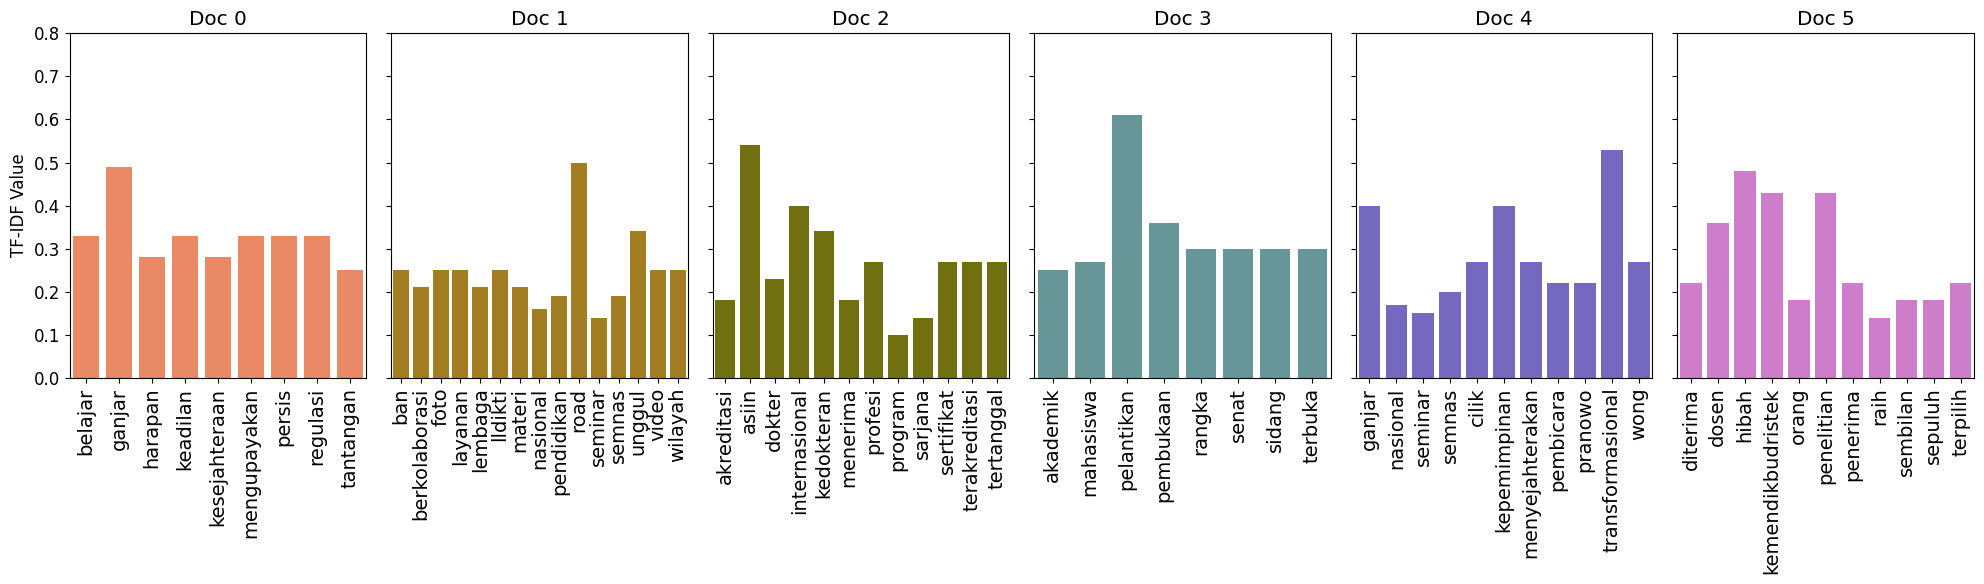

In [ ]:
x = 'terms'
y = 'tf_idf'

plt.rcParams['font.size'] = 12
fig, axes = plt.subplots(1, 6, figsize=(20,6), sharey = True)
sns.barplot(ax=axes[0], data = df_dtm_unigram_doc0, x = x, y = y, estimator= np.min, errwidth= 1.5, color = 'coral')
sns.barplot(ax=axes[1], data = df_dtm_unigram_doc1, x = x, y = y, estimator= np.min, errwidth= 1.5, color = 'darkgoldenrod')
sns.barplot(ax=axes[2], data = df_dtm_unigram_doc2, x = x, y = y, estimator= np.min, errwidth= 1.5, color = 'olive')
sns.barplot(ax=axes[3], data = df_dtm_unigram_doc3, x = x, y = y, estimator= np.min, errwidth= 1.5, color = 'cadetblue')
sns.barplot(ax=axes[4], data = df_dtm_unigram_doc4, x = x, y = y, estimator= np.min, errwidth= 1.5, color = 'slateblue')
sns.barplot(ax=axes[5], data = df_dtm_unigram_doc5, x = x, y = y, estimator= np.min, errwidth= 1.5, color = 'orchid')
axes[0].set(ylabel = 'TF-IDF Value')
axes[0].set_title('Doc 0')
axes[1].set_title('Doc 1')
axes[2].set_title('Doc 2')
axes[3].set_title('Doc 3')
axes[4].set_title('Doc 4')
axes[5].set_title('Doc 5')
axes[0].set(xlabel = None)
axes[1].set(xlabel = None)
axes[2].set(xlabel = None)
axes[3].set(xlabel = None)
axes[4].set(xlabel = None)
axes[5].set(xlabel = None)
axes[0].tick_params('x', labelrotation = 90, labelsize = 14)
axes[1].tick_params('x', labelrotation = 90, labelsize = 14)
axes[2].tick_params('x', labelrotation = 90, labelsize = 14)
axes[3].tick_params('x', labelrotation = 90, labelsize = 14)
axes[4].tick_params('x', labelrotation = 90, labelsize = 14)
axes[5].tick_params('x', labelrotation = 90, labelsize = 14)
axes[0].set(ylim=(0.00, 0.80))
plt.tight_layout()
plt.show()

#Plot semua docs

In [106]:
list_all_dtm_unigram = []
for i in range(len(list_of_dtm_unigram)):
  for j in range(len(list_of_dtm_unigram[i])):
    list_all_dtm_unigram.append(list_of_dtm_unigram[i][j])

In [107]:
df_dtm_unigram = pd.DataFrame(list_all_dtm_unigram, columns = ['terms', 'tf_idf'])

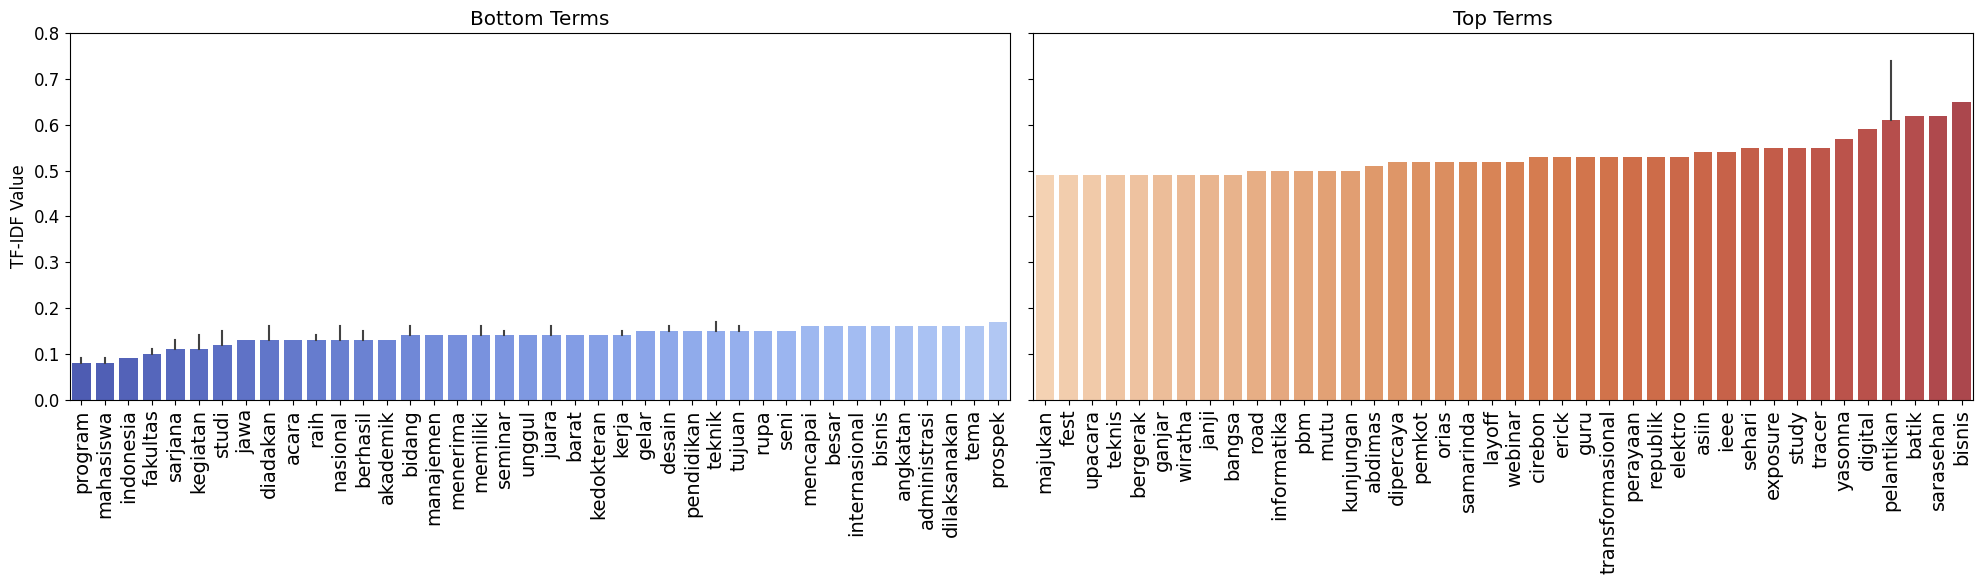

Lowest TF-IDF Value = 0.08 
Highest TF-IDF Value = 0.74


In [112]:
limit = 41
limit_bottom = 111
x = 'terms'
y = 'tf_idf'

data_sort = df_dtm_unigram.sort_values(by=[y], ascending = True)
data_bottom = data_sort[0:limit_bottom]
data_top = data_sort[(len(data_sort)-limit):len(data_sort)]

tf_idf_min = data_sort[y].min()
tf_idf_max = data_sort[y].max()

plt.rcParams['font.size'] = 12
fig, axes = plt.subplots(1, 2, figsize=(20,6), sharey = True)
sns.barplot(ax=axes[0], data = data_bottom, x = x, y = y, hue = x, estimator= np.min, err_kws={'linewidth': 1.5}, palette = sns.color_palette('coolwarm', limit*3))
sns.barplot(ax=axes[1], data = data_top, x = x, y = y, hue = x, estimator= np.min, err_kws={'linewidth': 1.5}, palette = sns.color_palette('icefire_r', limit*4))
axes[0].set(ylabel = 'TF-IDF Value')
axes[0].set_title('Bottom Terms')
axes[1].set_title('Top Terms')
axes[0].set(xlabel = None)
axes[1].set(xlabel = None)
axes[0].tick_params('x', labelrotation = 90, labelsize = 14)
axes[1].tick_params('x', labelrotation = 90, labelsize = 14)
axes[0].set(ylim=(0.00, 0.80))
plt.tight_layout()
plt.show()

print('Lowest TF-IDF Value =', tf_idf_min, '\nHighest TF-IDF Value =', tf_idf_max)

#Filtering low value (bila diperlukan)

In [41]:
def low_filtering(corpus_in, dictionary_in, tf_idf_in, low_value):
    corpus = corpus_in
    words = []
    dictionary = dictionary_in
    for i in range(0, len(corpus)):
        bow = corpus[i]
        low_value_words = []
        tfidf_ids = [id for id, value in tf_idf_in[bow]]
        bow_ids = [id for id, value in bow]
        low_value_words = [id for id, value in tf_idf_in[bow] if value < low_value]
        drops = low_value_words
        for item in drops:
          words.append(dictionary[item])
        new_bow = [b for b in bow if b[0] not in low_value_words]
        corpus[i] = new_bow
    return corpus

In [43]:
corpus_unigram_filtered = low_filtering(corpus_unigram, dictionary_unigram, tf_idf_unigram, 0.01)

In [45]:
# Lihat corpus filtered dan word frequency
print("Total number of elements in corpus unigram tf_idf_filtered: ", get_all_elements(corpus_unigram_filtered))
limit = 5
for doc in corpus_unigram_filtered[0:limit]:
   print([[dictionary_unigram[id], freq] for id, freq in doc])

Total number of elements in corpus unigram tf_idf_filtered:  926
[['belajar', 1], ['ganjar', 2], ['harapan', 1], ['keadilan', 1], ['kesejahteraan', 1], ['mengupayakan', 1], ['persis', 1], ['regulasi', 1], ['tantangan', 1]]
[['ban', 1], ['berkolaborasi', 1], ['foto', 1], ['layanan', 1], ['lembaga', 1], ['lldikti', 1], ['materi', 1], ['nasional', 1], ['pendidikan', 1], ['road', 2], ['seminar', 1], ['semnas', 1], ['unggul', 2], ['video', 1], ['wilayah', 1]]
[['akreditasi', 1], ['asiin', 2], ['dokter', 1], ['internasional', 2], ['kedokteran', 2], ['menerima', 1], ['profesi', 1], ['program', 1], ['sarjana', 1], ['sertifikat', 1], ['terakreditasi', 1], ['tertanggal', 1]]
[['akademik', 1], ['mahasiswa', 2], ['pelantikan', 2], ['pembukaan', 1], ['rangka', 1], ['senat', 1], ['sidang', 1], ['terbuka', 1]]
[['ganjar', 2], ['nasional', 1], ['seminar', 1], ['semnas', 1], ['cilik', 1], ['kepemimpinan', 2], ['menyejahterakan', 1], ['pembicara', 1], ['pranowo', 1], ['transformasional', 2], ['wong', 1]

_____

# Preprocessing tahap II bigram/trigram
Evaluation & low value filtering using TF-IDF pada corpus bigram/trigram

In [46]:
# Create dictionary & corpus
dictionary_trigram_high = Dictionary(text_list_trigrams_high)
corpus_trigram_high = [dictionary_trigram_high.doc2bow(text) for text in text_list_trigrams_high]

print(dictionary_trigram_high)
print(corpus_trigram_high)

Dictionary<600 unique tokens: ['belajar', 'ganjar', 'harapan', 'keadilan', 'kesejahteraan']...>
[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1)], [(24, 1), (25, 2), (26, 1), (27, 2), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)], [(36, 1), (37, 2), (38, 2), (39, 1), (40, 1), (41, 1)], [(1, 1), (16, 1), (19, 1), (20, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 2), (48, 1)], [(49, 1), (50, 2), (51, 3), (52, 2), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1)], [(60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1)], [(69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 2)], [(83, 1), (84, 4), (85, 2), (86, 1), (87, 2), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1

In [47]:
# Cek isi corpus
print("Total number of elements in corpus bow: ", get_all_elements(corpus_trigram_high))
limit = 5
for doc in corpus_trigram_high[0:limit]:
   print([[dictionary_trigram_high[id], freq] for id, freq in doc])

Total number of elements in corpus bow:  880
[['belajar', 1], ['ganjar', 2], ['harapan', 1], ['keadilan', 1], ['kesejahteraan', 1], ['mengupayakan', 1], ['persis', 1], ['regulasi', 1], ['tantangan', 1]]
[['ban', 1], ['berkolaborasi', 1], ['foto', 1], ['layanan', 1], ['lembaga', 1], ['lldikti', 1], ['materi', 1], ['nasional', 1], ['pendidikan', 1], ['road', 2], ['seminar', 1], ['semnas', 1], ['unggul', 2], ['video', 1], ['wilayah', 1]]
[['akreditasi', 1], ['asiin', 2], ['dokter', 1], ['internasional', 2], ['kedokteran', 2], ['menerima', 1], ['profesi', 1], ['program', 1], ['sarjana', 1], ['sertifikat', 1], ['terakreditasi', 1], ['tertanggal', 1]]
[['akademik', 1], ['mahasiswa', 2], ['pelantikan', 2], ['pembukaan', 1], ['senat_rangka', 1], ['sidang_terbuka', 1]]
[['ganjar', 1], ['nasional', 1], ['seminar', 1], ['semnas', 1], ['cilik', 1], ['ganjar_pranowo', 1], ['kepemimpinan', 2], ['menyejahterakan', 1], ['pembicara', 1], ['transformasional', 2], ['wong', 1]]


In [48]:
# Buat document terms matrix TF-IDF
tf_idf_trigram_high = TfidfModel(corpus_trigram_high, normalize = True, smartirs='ntc') # Fit TF-IDF model
tf_idf_corpus_trigram_high = tf_idf_trigram_high[corpus_trigram_high] # Apply TF-IDF model

In [49]:
# Lihat corpus TF-IDF dan weight (weight 0 otomatis dihapus oleh Gensim)
print("Total number of elements in corpus tf_idf: ", get_all_elements(tf_idf_corpus_trigram_high))
limit = 5
for doc in tf_idf_corpus_trigram_high[0:limit]:
   print([[dictionary_trigram_high[id], np.around(freq, decimals=2)] for id, freq in doc])

Total number of elements in corpus tf_idf:  880
[['belajar', 0.32], ['ganjar', 0.54], ['harapan', 0.27], ['keadilan', 0.32], ['kesejahteraan', 0.27], ['mengupayakan', 0.32], ['persis', 0.32], ['regulasi', 0.32], ['tantangan', 0.24]]
[['ban', 0.25], ['berkolaborasi', 0.21], ['foto', 0.25], ['layanan', 0.25], ['lembaga', 0.21], ['lldikti', 0.25], ['materi', 0.21], ['nasional', 0.16], ['pendidikan', 0.19], ['road', 0.5], ['seminar', 0.14], ['semnas', 0.19], ['unggul', 0.34], ['video', 0.25], ['wilayah', 0.25]]
[['akreditasi', 0.18], ['asiin', 0.54], ['dokter', 0.23], ['internasional', 0.4], ['kedokteran', 0.34], ['menerima', 0.18], ['profesi', 0.27], ['program', 0.1], ['sarjana', 0.14], ['sertifikat', 0.27], ['terakreditasi', 0.27], ['tertanggal', 0.27]]
[['akademik', 0.27], ['mahasiswa', 0.3], ['pelantikan', 0.67], ['pembukaan', 0.4], ['senat_rangka', 0.34], ['sidang_terbuka', 0.34]]
[['ganjar', 0.24], ['nasional', 0.18], ['seminar', 0.15], ['semnas', 0.21], ['cilik', 0.28], ['ganjar_pra

#Visualisasi DTM Trigram

In [50]:
list_of_dtm_trigram = []
for doc in tf_idf_corpus_trigram_high:
   list_of_dtm_trigram.append([[dictionary_trigram_high[id], np.around(freq, decimals=2)] for id, freq in doc])

#Plot 5 dokumen

In [ ]:
df_dtm_trigram_doc0 = pd.DataFrame(list_of_dtm_trigram[0], columns = ['terms', 'tf_idf'])
df_dtm_trigram_doc1 = pd.DataFrame(list_of_dtm_trigram[1], columns = ['terms', 'tf_idf'])
df_dtm_trigram_doc2 = pd.DataFrame(list_of_dtm_trigram[2], columns = ['terms', 'tf_idf'])
df_dtm_trigram_doc3 = pd.DataFrame(list_of_dtm_trigram[3], columns = ['terms', 'tf_idf'])
df_dtm_trigram_doc4 = pd.DataFrame(list_of_dtm_trigram[4], columns = ['terms', 'tf_idf'])
df_dtm_trigram_doc5 = pd.DataFrame(list_of_dtm_trigram[5], columns = ['terms', 'tf_idf'])

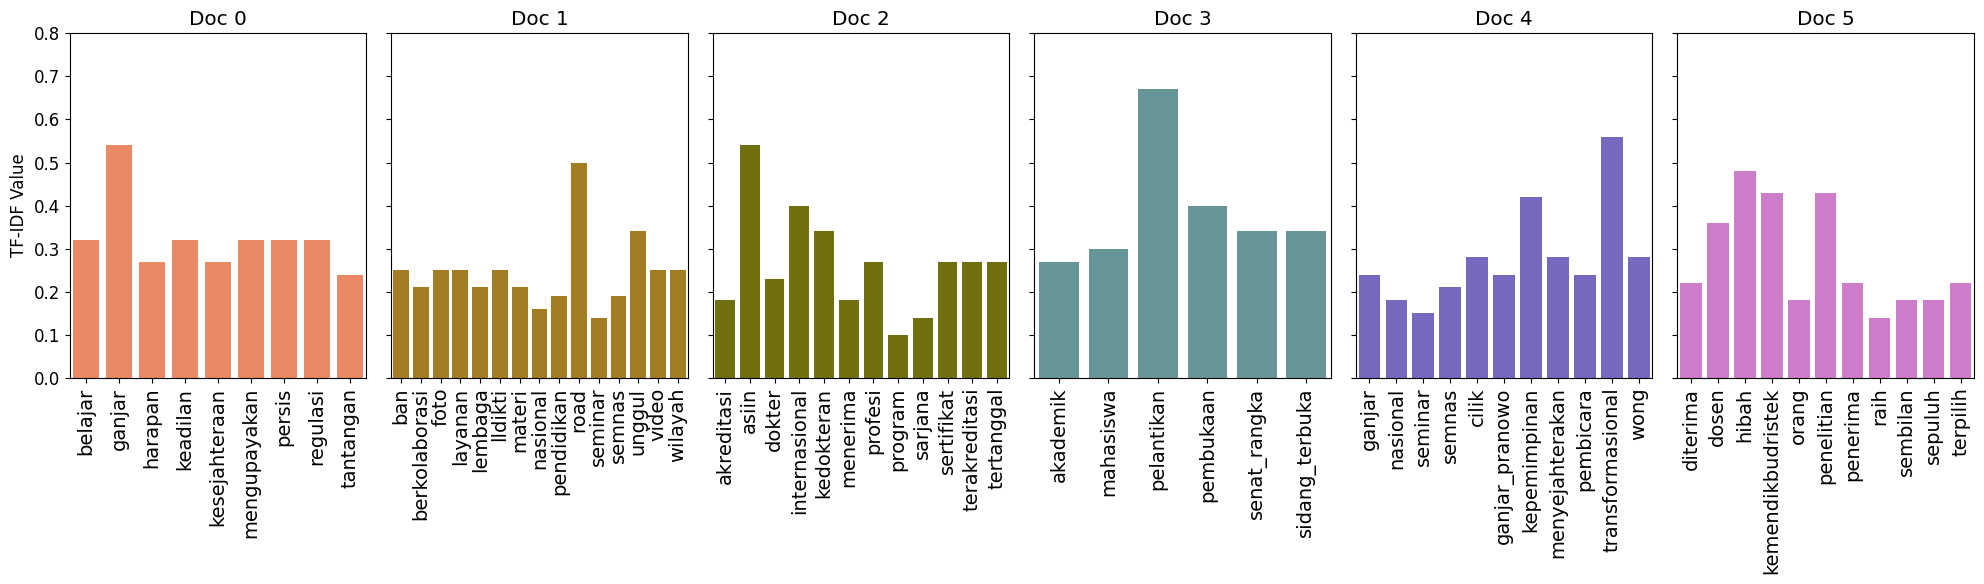

In [ ]:
x = 'terms'
y = 'tf_idf'

plt.rcParams['font.size'] = 12
fig, axes = plt.subplots(1, 6, figsize=(20,6), sharey = True)
sns.barplot(ax=axes[0], data = df_dtm_trigram_doc0, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'coral')
sns.barplot(ax=axes[1], data = df_dtm_trigram_doc1, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'darkgoldenrod')
sns.barplot(ax=axes[2], data = df_dtm_trigram_doc2, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'olive')
sns.barplot(ax=axes[3], data = df_dtm_trigram_doc3, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'cadetblue')
sns.barplot(ax=axes[4], data = df_dtm_trigram_doc4, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'slateblue')
sns.barplot(ax=axes[5], data = df_dtm_trigram_doc5, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'orchid')
axes[0].set(ylabel = 'TF-IDF Value')
axes[0].set_title('Doc 0')
axes[1].set_title('Doc 1')
axes[2].set_title('Doc 2')
axes[3].set_title('Doc 3')
axes[4].set_title('Doc 4')
axes[5].set_title('Doc 5')
axes[0].set(xlabel = None)
axes[1].set(xlabel = None)
axes[2].set(xlabel = None)
axes[3].set(xlabel = None)
axes[4].set(xlabel = None)
axes[5].set(xlabel = None)
axes[0].tick_params('x', labelrotation = 90, labelsize = 14)
axes[1].tick_params('x', labelrotation = 90, labelsize = 14)
axes[2].tick_params('x', labelrotation = 90, labelsize = 14)
axes[3].tick_params('x', labelrotation = 90, labelsize = 14)
axes[4].tick_params('x', labelrotation = 90, labelsize = 14)
axes[5].tick_params('x', labelrotation = 90, labelsize = 14)
axes[0].set(ylim=(0.00, 0.80))
plt.tight_layout()
plt.show()

#Plot semua docs

In [51]:
list_all_dtm_trigram = []
for i in range(len(list_of_dtm_trigram)):
  for j in range(len(list_of_dtm_trigram[i])):
    list_all_dtm_trigram.append(list_of_dtm_trigram[i][j])

In [52]:
df_dtm_trigram = pd.DataFrame(list_all_dtm_trigram, columns = ['terms', 'tf_idf'])

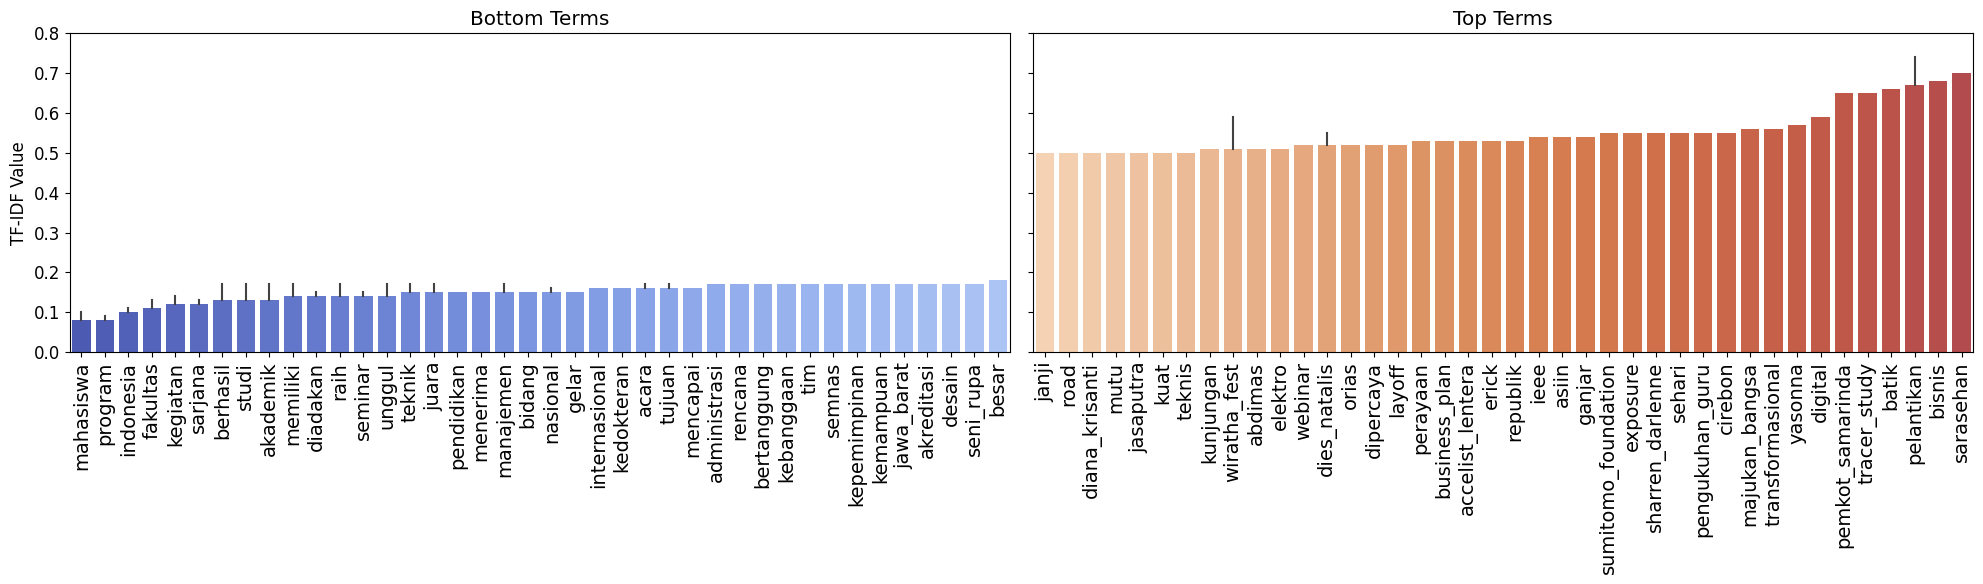

Lowest TF-IDF Value = 0.08 
Highest TF-IDF Value = 0.74


In [63]:
limit = 43
limit_bottom = 117
x = 'terms'
y = 'tf_idf'

data_sort = df_dtm_trigram.sort_values(by=[y], ascending = True)
data_bottom = data_sort[0:limit_bottom]
data_top = data_sort[(len(data_sort)-limit):len(data_sort)]

tf_idf_min = data_sort[y].min()
tf_idf_max = data_sort[y].max()

plt.rcParams['font.size'] = 12
fig, axes = plt.subplots(1, 2, figsize=(20,6), sharey = True)
sns.barplot(ax=axes[0], data = data_bottom, x = x, y = y, hue = x, estimator= np.min, err_kws={'linewidth': 1.5}, palette = sns.color_palette('coolwarm', limit*3))
sns.barplot(ax=axes[1], data = data_top, x = x, y = y, hue = x, estimator= np.min, err_kws={'linewidth': 1.5}, palette = sns.color_palette('icefire_r', limit*4))
axes[0].set(ylabel = 'TF-IDF Value')
axes[0].set_title('Bottom Terms')
axes[1].set_title('Top Terms')
axes[0].set(xlabel = None)
axes[1].set(xlabel = None)
axes[0].tick_params('x', labelrotation = 90, labelsize = 14)
axes[1].tick_params('x', labelrotation = 90, labelsize = 14)
axes[0].set(ylim=(0.00, 0.80))
plt.tight_layout()
plt.show()

print('Lowest TF-IDF Value =', tf_idf_min, '\nHighest TF-IDF Value =', tf_idf_max)

#Filtering low value (bila diperlukan)

In [64]:
corpus_trigram_high_filtered = low_filtering(corpus_trigram_high, dictionary_trigram_high, tf_idf_trigram_high, 0.01)

In [65]:
# Lihat corpus filtered dan word frequency
print("Total number of elements in corpus trigram tf_idf_filtered: ", get_all_elements(corpus_trigram_high_filtered))
limit = 5
for doc in corpus_trigram_high_filtered[0:limit]:
   print([[dictionary_trigram_high[id], freq] for id, freq in doc])

Total number of elements in corpus trigram tf_idf_filtered:  880
[['belajar', 1], ['ganjar', 2], ['harapan', 1], ['keadilan', 1], ['kesejahteraan', 1], ['mengupayakan', 1], ['persis', 1], ['regulasi', 1], ['tantangan', 1]]
[['ban', 1], ['berkolaborasi', 1], ['foto', 1], ['layanan', 1], ['lembaga', 1], ['lldikti', 1], ['materi', 1], ['nasional', 1], ['pendidikan', 1], ['road', 2], ['seminar', 1], ['semnas', 1], ['unggul', 2], ['video', 1], ['wilayah', 1]]
[['akreditasi', 1], ['asiin', 2], ['dokter', 1], ['internasional', 2], ['kedokteran', 2], ['menerima', 1], ['profesi', 1], ['program', 1], ['sarjana', 1], ['sertifikat', 1], ['terakreditasi', 1], ['tertanggal', 1]]
[['akademik', 1], ['mahasiswa', 2], ['pelantikan', 2], ['pembukaan', 1], ['senat_rangka', 1], ['sidang_terbuka', 1]]
[['ganjar', 1], ['nasional', 1], ['seminar', 1], ['semnas', 1], ['cilik', 1], ['ganjar_pranowo', 1], ['kepemimpinan', 2], ['menyejahterakan', 1], ['pembicara', 1], ['transformasional', 2], ['wong', 1]]


#B. PROCESSING
-----
-----

#LDA topic modeling


In [66]:
from gensim.models import LdaModel

In [67]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

#Build initial models untuk evaluasi coherence score corpus unigram filtered

In [68]:
# Gensim LDA model
def compute_coherence_values_lda_model_unigram(dictionary, corpus, texts, limit, start, step):
    coherence_values_lda_unigram = []
    model_list_lda_unigram = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, chunksize=2000, alpha='auto', eta='auto', iterations=200, passes=50, eval_every=None, random_state=5)

        model_list_lda_unigram.append(lda_model)
        coherencemodel_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_lda_unigram.append(coherencemodel_lda.get_coherence())

    return model_list_lda_unigram, coherence_values_lda_unigram

In [69]:
start = 1
limit = 40
step = 1
dictionary = dictionary_unigram
corpus = corpus_unigram_filtered
texts = text_list
model_list_lda_unigram, coherence_values_lda_unigram = compute_coherence_values_lda_model_unigram(dictionary=dictionary, corpus=corpus, texts=texts, start=start, limit=limit, step=step)

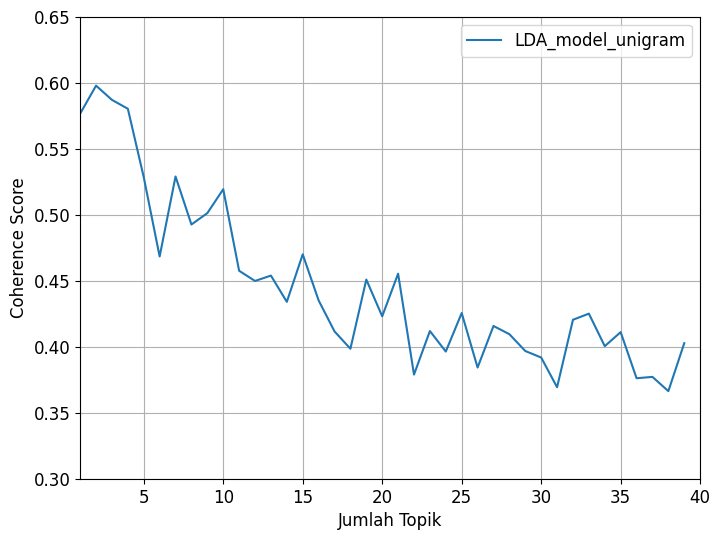

In [71]:
# Show graph
x = range(start, limit, step)
y_lda = coherence_values_lda_unigram

plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 12
plt.plot(x, y_lda, label='LDA_model_unigram')
plt.xlabel("Jumlah Topik")
plt.ylabel("Coherence Score")
plt.ylim(0.3, 0.65)
plt.xlim(1, 40)
plt.legend(loc='best')
plt.grid()
plt.savefig('DATASAVE/SERP2_coherence_graph_unigram.png')
plt.show()

Dari grafik di atas, melihat range antara k = 5 s.d. 15, kandidat pilihan untuk analisis validasi adalah K = 5, 7, 10

In [72]:
# Print the coherence scores
for m, cv in zip(x, coherence_values_lda_unigram):
    print("Jumlah Topik =", m, ", Coherence Score =", round(cv, 4))

Jumlah Topik = 1 , Coherence Score = 0.5766
Jumlah Topik = 2 , Coherence Score = 0.5978
Jumlah Topik = 3 , Coherence Score = 0.587
Jumlah Topik = 4 , Coherence Score = 0.5803
Jumlah Topik = 5 , Coherence Score = 0.5284
Jumlah Topik = 6 , Coherence Score = 0.4684
Jumlah Topik = 7 , Coherence Score = 0.529
Jumlah Topik = 8 , Coherence Score = 0.4926
Jumlah Topik = 9 , Coherence Score = 0.5012
Jumlah Topik = 10 , Coherence Score = 0.5193
Jumlah Topik = 11 , Coherence Score = 0.4575
Jumlah Topik = 12 , Coherence Score = 0.4498
Jumlah Topik = 13 , Coherence Score = 0.4539
Jumlah Topik = 14 , Coherence Score = 0.434
Jumlah Topik = 15 , Coherence Score = 0.47
Jumlah Topik = 16 , Coherence Score = 0.4351
Jumlah Topik = 17 , Coherence Score = 0.4116
Jumlah Topik = 18 , Coherence Score = 0.3985
Jumlah Topik = 19 , Coherence Score = 0.4509
Jumlah Topik = 20 , Coherence Score = 0.423
Jumlah Topik = 21 , Coherence Score = 0.4553
Jumlah Topik = 22 , Coherence Score = 0.3789
Jumlah Topik = 23 , Coher

#Eksplorasi terms isi topik untuk menentukan kandidat jumlah topik optimal

In [ ]:
num_topics = 5
x = num_topics-1
optimal_model_lda = model_list_lda_unigram[x]
optimal_model_lda.show_topics(num_topics)

[(0,
  '0.024*"mahasiswa" + 0.015*"program" + 0.015*"pelantikan" + 0.012*"akademik" + 0.009*"jawa" + 0.009*"akreditasi" + 0.009*"indonesia" + 0.006*"dunia" + 0.006*"chatgpt" + 0.006*"sains"'),
 (1,
  '0.021*"bisnis" + 0.013*"guru" + 0.013*"besar" + 0.011*"batik" + 0.011*"wiratha" + 0.011*"fakultas" + 0.011*"fest" + 0.011*"indonesia" + 0.011*"mahasiswa" + 0.008*"manajemen"'),
 (2,
  '0.013*"teknik" + 0.009*"jawa" + 0.009*"iai" + 0.009*"informatika" + 0.009*"pit" + 0.009*"pdui" + 0.009*"kolaborasi" + 0.009*"program" + 0.009*"sarjana" + 0.009*"barat"'),
 (3,
  '0.016*"seminar" + 0.013*"kerja" + 0.013*"teknik" + 0.013*"unggul" + 0.011*"program" + 0.011*"nasional" + 0.011*"kedokteran" + 0.008*"elektro" + 0.008*"juara" + 0.008*"semnas"'),
 (4,
  '0.017*"mahasiswa" + 0.014*"fakultas" + 0.011*"studi" + 0.011*"program" + 0.011*"kegiatan" + 0.011*"desain" + 0.009*"rupa" + 0.009*"seni" + 0.009*"diadakan" + 0.009*"indonesia"')]

In [ ]:
num_topics = 7
x = num_topics-1
optimal_model_lda = model_list_lda_unigram[x]
optimal_model_lda.show_topics(num_topics)

[(0,
  '0.020*"program" + 0.016*"akreditasi" + 0.016*"mahasiswa" + 0.011*"sumitomo" + 0.011*"sains" + 0.011*"psikologi" + 0.011*"magister" + 0.011*"foundation" + 0.011*"negara" + 0.011*"teknis"'),
 (1,
  '0.026*"bisnis" + 0.020*"fest" + 0.020*"wiratha" + 0.013*"indonesia" + 0.013*"mahasiswa" + 0.013*"batik" + 0.010*"manajemen" + 0.010*"kuliah" + 0.010*"kerja" + 0.010*"mou"'),
 (2,
  '0.012*"pit" + 0.012*"seoul" + 0.012*"lasem" + 0.012*"batik" + 0.012*"tracer" + 0.012*"penghargaan" + 0.012*"indonesia" + 0.012*"iai" + 0.012*"study" + 0.012*"kolaborasi"'),
 (3,
  '0.017*"teknik" + 0.014*"program" + 0.014*"kedokteran" + 0.014*"seminar" + 0.011*"semnas" + 0.011*"juara" + 0.011*"elektro" + 0.011*"kepemimpinan" + 0.011*"internasional" + 0.011*"digital"'),
 (4,
  '0.013*"batik" + 0.013*"program" + 0.013*"hibah" + 0.013*"berhasil" + 0.013*"mahasiswa" + 0.013*"studi" + 0.013*"indonesia" + 0.013*"fakultas" + 0.009*"siswa" + 0.009*"perdana"'),
 (5,
  '0.029*"mahasiswa" + 0.022*"besar" + 0.018*"pel

In [ ]:
num_topics = 10
x = num_topics-1
optimal_model_lda = model_list_lda_unigram[x]
optimal_model_lda.show_topics(num_topics)

[(0,
  '0.024*"program" + 0.018*"juara" + 0.018*"akreditasi" + 0.012*"negara" + 0.012*"teknik" + 0.012*"mahasiswa" + 0.012*"kedokteran" + 0.012*"sumitomo" + 0.012*"psikologi" + 0.012*"foundation"'),
 (1,
  '0.038*"bisnis" + 0.019*"indonesia" + 0.019*"batik" + 0.015*"manajemen" + 0.015*"fakultas" + 0.015*"kuliah" + 0.010*"fest" + 0.010*"budaya" + 0.010*"perayaan" + 0.010*"dunia"'),
 (2,
  '0.018*"lasem" + 0.018*"generasi" + 0.018*"batik" + 0.018*"seoul" + 0.018*"penghargaan" + 0.018*"webinar" + 0.010*"karya" + 0.010*"ketiga" + 0.010*"fsrd" + 0.010*"satunya"'),
 (3,
  '0.027*"seminar" + 0.018*"nasional" + 0.018*"unggul" + 0.014*"program" + 0.009*"pendidikan" + 0.009*"fakultas" + 0.009*"materi" + 0.009*"sarjana" + 0.009*"tim" + 0.009*"teknik"'),
 (4,
  '0.014*"bpk" + 0.014*"siswa" + 0.014*"erick" + 0.014*"penabur" + 0.014*"wisuda" + 0.014*"informatika" + 0.014*"teknik" + 0.014*"kegiatan" + 0.014*"sma" + 0.014*"studi"'),
 (5,
  '0.027*"mahasiswa" + 0.014*"besar" + 0.014*"desain" + 0.010*"b

-----

##Build initial models untuk evaluasi coherence score corpus trigram

In [73]:
def compute_coherence_values_lda_model_trigram_high(dictionary, corpus, texts, limit, start, step):
    coherence_values_lda_trigram_high = []
    model_list_lda_trigram_high = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, chunksize=2000, alpha='auto', eta='auto', iterations=200, passes=50, eval_every=None, random_state=5)

        model_list_lda_trigram_high.append(lda_model)
        coherencemodel_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_lda_trigram_high.append(coherencemodel_lda.get_coherence())

    return model_list_lda_trigram_high, coherence_values_lda_trigram_high

In [74]:
start = 1
limit = 40
step = 1
dictionary = dictionary_trigram_high
corpus = corpus_trigram_high_filtered
texts = text_list_trigrams_high
model_list_lda_trigram_high, coherence_values_lda_trigram_high = compute_coherence_values_lda_model_trigram_high(dictionary=dictionary, corpus=corpus, texts=texts, start=start, limit=limit, step=step)

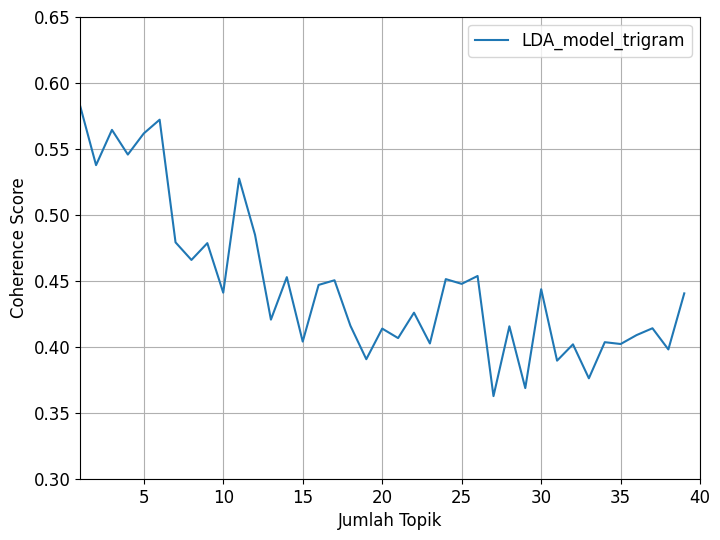

In [76]:
# Show graph
x = range(start, limit, step)
y_lda = coherence_values_lda_trigram_high

plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 12
plt.plot(x, y_lda, label='LDA_model_trigram')
plt.xlabel("Jumlah Topik")
plt.ylabel("Coherence Score")
plt.ylim(0.3, 0.65)
plt.xlim(1, 40)
plt.legend(loc='best')
plt.grid()
plt.savefig('DATASAVE/SERP2_coherence_graph_trigram.png')
plt.show()

Dari 2 grafik di atas, melihat range antara k = 5 s.d. 15, model trigram berkinerja sedikit lebih baik (coherence score lebih tinggi). Kandidat pilihan untuk analisis validasi adalah k = 6, 9, 11

In [77]:
# Print the coherence scores
for m, cv in zip(x, coherence_values_lda_trigram_high):
    print("Jumlah Topik =", m, ", Coherence Score =", round(cv, 4))

Jumlah Topik = 1 , Coherence Score = 0.5824
Jumlah Topik = 2 , Coherence Score = 0.5376
Jumlah Topik = 3 , Coherence Score = 0.5643
Jumlah Topik = 4 , Coherence Score = 0.5456
Jumlah Topik = 5 , Coherence Score = 0.5616
Jumlah Topik = 6 , Coherence Score = 0.572
Jumlah Topik = 7 , Coherence Score = 0.4791
Jumlah Topik = 8 , Coherence Score = 0.4657
Jumlah Topik = 9 , Coherence Score = 0.4785
Jumlah Topik = 10 , Coherence Score = 0.4409
Jumlah Topik = 11 , Coherence Score = 0.5274
Jumlah Topik = 12 , Coherence Score = 0.4848
Jumlah Topik = 13 , Coherence Score = 0.4205
Jumlah Topik = 14 , Coherence Score = 0.4527
Jumlah Topik = 15 , Coherence Score = 0.4039
Jumlah Topik = 16 , Coherence Score = 0.4468
Jumlah Topik = 17 , Coherence Score = 0.4503
Jumlah Topik = 18 , Coherence Score = 0.4159
Jumlah Topik = 19 , Coherence Score = 0.3905
Jumlah Topik = 20 , Coherence Score = 0.4137
Jumlah Topik = 21 , Coherence Score = 0.4065
Jumlah Topik = 22 , Coherence Score = 0.4258
Jumlah Topik = 23 , 

#Eksplorasi terms isi topik untuk menentukan kandidat jumlah topik optimal

In [ ]:
num_topics = 6
x = num_topics-1
optimal_model_lda_trigram = model_list_lda_trigram_high[x]
optimal_model_lda_trigram.show_topics(num_topics)

[(0,
  '0.017*"elektro" + 0.017*"seminar" + 0.017*"pembicara" + 0.017*"kepemimpinan" + 0.017*"ganjar_pranowo" + 0.017*"hibah" + 0.017*"teknik" + 0.011*"kemendikbudristek" + 0.011*"kerja" + 0.011*"penelitian"'),
 (1,
  '0.024*"mahasiswa" + 0.014*"studi" + 0.014*"juara" + 0.011*"mou" + 0.011*"seni_rupa" + 0.011*"kerja_sama" + 0.011*"desain" + 0.011*"kabupaten" + 0.011*"program" + 0.011*"pemerintah"'),
 (2,
  '0.021*"fakultas" + 0.017*"dies_natalis" + 0.013*"indonesia" + 0.013*"rangkaian" + 0.009*"start" + 0.009*"perayaan" + 0.009*"kedokteran" + 0.009*"layoff" + 0.009*"wiratha_fest" + 0.009*"abdimas"'),
 (3,
  '0.023*"mahasiswa" + 0.023*"program" + 0.014*"sarjana" + 0.012*"generasi" + 0.012*"akreditasi" + 0.012*"teknik" + 0.012*"indonesia" + 0.010*"wiratha_fest" + 0.010*"internasional" + 0.010*"batik"'),
 (4,
  '0.011*"batik_lasem" + 0.011*"indonesia" + 0.011*"penghargaan" + 0.011*"menerima" + 0.011*"sehari" + 0.011*"seminar" + 0.011*"exposure" + 0.011*"kunjungan" + 0.006*"pemenang" + 0.0

In [ ]:
num_topics = 9
x = num_topics-1
optimal_model_lda_trigram = model_list_lda_trigram_high[x]
optimal_model_lda_trigram.show_topics(num_topics)

[(0,
  '0.026*"teknik" + 0.026*"elektro" + 0.017*"dunia" + 0.017*"bantu" + 0.017*"pro" + 0.017*"chatgpt" + 0.017*"alat" + 0.017*"akademik" + 0.017*"prospek" + 0.017*"manufaktur"'),
 (1,
  '0.019*"kabupaten" + 0.019*"studi" + 0.013*"jurusan" + 0.013*"program" + 0.013*"pemerintah" + 0.013*"mahasiswa" + 0.013*"kerja" + 0.013*"pembangunan" + 0.013*"kerja_sama" + 0.013*"seni_rupa"'),
 (2,
  '0.027*"wiratha_fest" + 0.020*"fakultas" + 0.020*"mahasiswa" + 0.014*"abdimas" + 0.014*"kegiatan" + 0.014*"pengabdian" + 0.014*"acara" + 0.014*"masyarakat" + 0.014*"rangkaian" + 0.014*"republik"'),
 (3,
  '0.025*"mahasiswa" + 0.018*"program" + 0.018*"teknik" + 0.014*"indonesia" + 0.014*"sarjana" + 0.014*"digital" + 0.014*"batik" + 0.011*"budaya" + 0.011*"juara" + 0.011*"industri"'),
 (4,
  '0.018*"hibah" + 0.012*"batik_lasem" + 0.012*"orang" + 0.012*"raih" + 0.012*"sepuluh" + 0.012*"indonesia" + 0.012*"penghargaan" + 0.012*"kemendikbudristek" + 0.012*"dosen" + 0.012*"penelitian"'),
 (5,
  '0.043*"bisnis"

In [ ]:
num_topics = 11
x = num_topics-1
optimal_model_lda_trigram = model_list_lda_trigram_high[x]
optimal_model_lda_trigram.show_topics(num_topics)

[(0,
  '0.027*"branding_citra" + 0.027*"kuat" + 0.027*"pengukuhan_guru" + 0.027*"besar" + 0.014*"pengalaman" + 0.014*"identitas" + 0.014*"kampanye" + 0.014*"konsisten" + 0.014*"mahasiswa" + 0.014*"penentuan"'),
 (1,
  '0.049*"mahasiswa" + 0.025*"juara" + 0.019*"pelantikan" + 0.019*"fakultas" + 0.013*"lomba" + 0.013*"bergerak" + 0.013*"sastra_jepang" + 0.013*"kerja_sama" + 0.013*"kabupaten" + 0.013*"desain"'),
 (2,
  '0.031*"mahasiswa" + 0.025*"fakultas" + 0.025*"wiratha_fest" + 0.019*"kegiatan" + 0.013*"teknik" + 0.013*"industri" + 0.013*"rangkaian" + 0.013*"abdimas" + 0.013*"studi" + 0.013*"masyarakat"'),
 (3,
  '0.018*"batik" + 0.018*"teknik" + 0.018*"generasi" + 0.018*"hibah" + 0.018*"mahasiswa" + 0.018*"indonesia" + 0.014*"program" + 0.014*"negara" + 0.009*"budaya" + 0.009*"sarjana"'),
 (4,
  '0.012*"grisella" + 0.012*"inggris" + 0.012*"amrullah" + 0.012*"orang" + 0.012*"arianne" + 0.012*"ariel" + 0.012*"bella" + 0.012*"darlene" + 0.012*"sepuluh" + 0.012*"ferrel"'),
 (5,
  '0.029*"

-----

#Analisis visual pyLDAvis

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
!pip install pyldavis
#!pip install --upgrade pyldavis

In [80]:
# Reinstall pandas & numpy to this version if notebook running on Google Colab
# pyLDAvis on Google Colab works only with this version
# !pip install pandas==1.5.3
# !pip install numpy==1.23.5

In [82]:
import pyLDAvis.gensim

In [ ]:
pyLDAvis.enable_notebook() # enable visualisation on notebook

-----

#pyLDAvis pada corpus unigram



In [85]:
# Build model unigram yang akan dianalisis
num_topics = 4
x = num_topics-1
select_model_lda_unigram_4 = model_list_lda_unigram[x]

num_topics = 7
x = num_topics-1
select_model_lda_unigram_7 = model_list_lda_unigram[x]

num_topics = 10
x = num_topics-1
select_model_lda_unigram_10 = model_list_lda_unigram[x]

In [86]:
ldamodel = select_model_lda_unigram_4
dictionary = dictionary_unigram
corpus = corpus_unigram_filtered

vis4_u = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis4_u

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.136929 -0.002530       1        1  37.728723
3     -0.077007  0.058172       2        1  28.236617
0     -0.051055 -0.102698       3        1  19.899238
2     -0.008867  0.047056       4        1  14.135423, topic_info=           Term      Freq      Total Category  logprob  loglift
38   pelantikan  3.000000   3.000000  Default  30.0000  30.0000
135      bisnis  7.000000   7.000000  Default  29.0000  29.0000
90        batik  6.000000   6.000000  Default  28.0000  28.0000
36     akademik  3.000000   3.000000  Default  27.0000  27.0000
168        jawa  3.000000   3.000000  Default  26.0000  26.0000
..          ...       ...        ...      ...      ...      ...
90        batik  1.139605   6.763454   Topic4  -4.9393   0.1756
135      bisnis  1.139605   7.495625   Topic4  -4.9393   0.0728
301    fakultas  1.139605   9.228426   Topic4  -4.9393  -0.1351
95    indonesia  1.139605  10.268737   Topic4  -4.9393  -0.2419
13      lembaga  0.633102   1.803620   Topic4  -5.5271   0.9096

[216 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
480       1  0.708769      abdimas
198       1  0.600913        acara
198       4  0.300457        acara
459       3  0.553416     accelist
102       2  0.770925         ahli
...     ...       ...          ...
415       4  0.610382      webinar
177       3  0.822280  webometrics
189       1  0.996353      wiratha
284       2  1.015743       wisuda
118       2  1.015743      yasonna

[244 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

In [87]:
ldamodel = select_model_lda_unigram_7
dictionary = dictionary_unigram
corpus = corpus_unigram_filtered

vis7_u = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis7_u

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.160575  0.077904       1        1  19.873902
3     -0.118953  0.060951       2        1  18.456730
5     -0.011307 -0.154251       3        1  17.306293
4      0.042179 -0.060444       4        1  14.297830
6     -0.036106  0.072379       5        1  11.288707
0     -0.051875  0.028116       6        1  10.140084
2      0.015488 -0.024654       7        1   8.636453, topic_info=           Term      Freq     Total Category  logprob  loglift
135      bisnis  7.000000  7.000000  Default  30.0000  30.0000
119       besar  4.000000  4.000000  Default  29.0000  29.0000
189     wiratha  4.000000  4.000000  Default  28.0000  28.0000
183        fest  4.000000  4.000000  Default  27.0000  27.0000
38   pelantikan  4.000000  4.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
139       award  0.598431  1.800292   Topic7  -5.0907   1.3478
140    berjudul  0.598431  1.744841   Topic7  -5.0907   1.3791
141      design  0.598431  2.445020   Topic7  -5.0907   1.0417
145       karya  0.598431  1.871237   Topic7  -5.0907   1.3091
149    pemenang  0.598431  1.855993   Topic7  -5.0907   1.3173

[367 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
459       6  0.568680  accelist
102       2  0.750543      ahli
343       4  0.783290      ajak
36        2  0.251130  akademik
36        3  0.502260  akademik
...     ...       ...       ...
189       1  0.812015   wiratha
284       4  0.520455    wisuda
285       4  0.783290       xii
118       3  0.498615   yasonna
291       6  0.836678  yuspendi

[429 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 6, 5, 7, 1, 3])

In [88]:
ldamodel = select_model_lda_unigram_10
dictionary = dictionary_unigram
corpus = corpus_unigram_filtered

vis10_u = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis10_u

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.144663 -0.099579       1        1  21.252486
3      0.144922 -0.047278       2        1  14.272365
1     -0.040634  0.168179       3        1  13.384185
0      0.020870 -0.069086       4        1   9.422850
6      0.106260  0.021313       5        1   9.235845
7     -0.036875  0.039224       6        1   8.268360
8     -0.005969  0.077411       7        1   7.735471
4      0.042860 -0.043097       8        1   7.389976
2     -0.052528 -0.032831       9        1   4.746532
9     -0.034243 -0.014257      10        1   4.291930, topic_info=           Term      Freq      Total Category  logprob  loglift
135      bisnis  7.000000   7.000000  Default  30.0000  30.0000
19      seminar  7.000000   7.000000  Default  29.0000  29.0000
38   pelantikan  3.000000   3.000000  Default  28.0000  28.0000
90        batik  6.000000   6.000000  Default  27.0000  27.0000
63        kerja  6.000000   6.000000  Default  26.0000  26.0000
..          ...       ...        ...      ...      ...      ...
36     akademik  0.921769   3.604395  Topic10  -3.9595   1.7848
37    mahasiswa  0.921769  14.795710  Topic10  -3.9595   0.3726
58         raih  0.482826   3.499780  Topic10  -4.6061   1.1676
80      lulusan  0.482826   2.404249  Topic10  -4.6061   1.5431
95    indonesia  0.482826  10.358289  Topic10  -4.6061   0.0825

[491 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
480       1  0.376202   abdimas
480       5  0.376202   abdimas
199       3  0.756991  acaranya
459       7  0.561108  accelist
509       4  0.803216       adi
...     ...       ...       ...
284       8  0.567931    wisuda
50        2  0.749542      wong
285       8  0.842253       xii
118       1  0.909875   yasonna
291       4  0.803216  yuspendi

[536 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 2, 1, 7, 8, 9, 5, 3, 10])

-----

#pyLDAvis pada corpus trigram



In [89]:
# Build model trigram yang akan dianalisis
num_topics = 6
x = num_topics-1
select_model_lda_trigram_6 = model_list_lda_trigram_high[x]

num_topics = 9
x = num_topics-1
select_model_lda_trigram_9 = model_list_lda_trigram_high[x]

num_topics = 11
x = num_topics-1
select_model_lda_trigram_11 = model_list_lda_trigram_high[x]

In [90]:
ldamodel = select_model_lda_trigram_6
dictionary = dictionary_trigram_high
corpus = corpus_trigram_high_filtered

vis6_t = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis6_t

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.089372  0.136764       1        1  31.859431
1      0.113091 -0.107151       2        1  18.858667
5     -0.122377  0.000456       3        1  17.238892
2     -0.034217  0.044803       4        1  13.890505
4     -0.041253 -0.031067       5        1   9.414363
0     -0.004617 -0.043804       6        1   8.738143, topic_info=             Term      Freq     Total Category  logprob  loglift
131        bisnis  6.000000  6.000000  Default  30.0000  30.0000
81         teknik  7.000000  7.000000  Default  29.0000  29.0000
44   kepemimpinan  2.000000  2.000000  Default  28.0000  28.0000
98        elektro  2.000000  2.000000  Default  27.0000  27.0000
19        seminar  6.000000  6.000000  Default  26.0000  26.0000
..            ...       ...       ...      ...      ...      ...
97         bidang  0.557219  2.369784   Topic6  -5.0981   0.9899
104       rencana  0.557219  1.747146   Topic6  -5.0981   1.2947
1          ganjar  0.557219  2.369783   Topic6  -5.0981   0.9899
16       nasional  0.557219  4.497997   Topic6  -5.0981   0.3490
20         semnas  0.557219  2.444273   Topic6  -5.0981   0.9589

[317 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
461       4  0.437286   abdimas
461       5  0.437286   abdimas
189       3  0.343547     acara
189       4  0.343547     acara
189       6  0.343547     acara
...     ...       ...       ...
48        6  0.922294      wong
113       1  0.933288  wujudkan
114       1  0.933288   yasonna
500       2  0.787692   yayasan
501       2  0.787692     yobel

[363 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 6, 3, 5, 1])

In [91]:
ldamodel = select_model_lda_trigram_9
dictionary = dictionary_trigram_high
corpus = corpus_trigram_high_filtered

vis9_t = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis9_t

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.042421  0.151140       1        1  20.835268
7     -0.131591 -0.005664       2        1  16.059146
5      0.158179 -0.041784       3        1  11.780109
6     -0.075101 -0.103155       4        1  11.388328
4      0.024097  0.017362       5        1  10.169203
1     -0.010906 -0.071883       6        1   9.393830
2      0.038947  0.075865       7        1   8.436003
8     -0.015400 -0.022379       8        1   6.634557
0      0.054196  0.000497       9        1   5.303555, topic_info=             Term      Freq      Total Category  logprob  loglift
131        bisnis  6.000000   6.000000  Default  30.0000  30.0000
81         teknik  7.000000   7.000000  Default  29.0000  29.0000
19        seminar  6.000000   6.000000  Default  28.0000  28.0000
180  wiratha_fest  4.000000   4.000000  Default  27.0000  27.0000
98        elektro  2.000000   2.000000  Default  26.0000  26.0000
..            ...       ...        ...      ...      ...      ...
81         teknik  1.415832   7.552220   Topic9  -3.6663   1.2627
37      mahasiswa  0.960740  14.326454   Topic9  -4.0541   0.2346
69    bertanggung  0.505647   1.831736   Topic9  -4.6959   1.6496
97         bidang  0.505647   2.364481   Topic9  -4.6959   1.3943
17     pendidikan  0.505647   2.342279   Topic9  -4.6959   1.4038

[434 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
461       5  0.422607   abdimas
461       7  0.422607   abdimas
189       2  0.321104     acara
189       3  0.321104     acara
189       7  0.321104     acara
...     ...       ...       ...
113       4  0.528184  wujudkan
114       4  0.528184   yasonna
500       6  0.827734   yayasan
501       6  0.827734     yobel
279       2  0.753588  yuspendi

[499 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 6, 7, 5, 2, 3, 9, 1])

In [92]:
ldamodel = select_model_lda_trigram_11
dictionary = dictionary_trigram_high
corpus = corpus_trigram_high_filtered

vis11_t = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis11_t

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.181533 -0.029650       1        1  18.044365
3      0.066911 -0.058849       2        1  16.137856
9      0.147232  0.102213       3        1  14.327646
2      0.084312 -0.093587       4        1  10.697980
1      0.019248 -0.138521       5        1  10.517031
7     -0.015107  0.093416       6        1   8.049406
8     -0.055097  0.068278       7        1   7.199342
6     -0.016087  0.047455       8        1   4.817434
10    -0.023164 -0.014961       9        1   4.255840
4     -0.017391  0.015062      10        1   3.694848
0     -0.009324  0.009144      11        1   2.258250, topic_info=              Term       Freq      Total Category  logprob  loglift
37       mahasiswa  13.000000  13.000000  Default  30.0000  30.0000
24      akreditasi   4.000000   4.000000  Default  29.0000  29.0000
131         bisnis   7.000000   7.000000  Default  28.0000  28.0000
19         seminar   6.000000   6.000000  Default  27.0000  27.0000
293          juara   5.000000   5.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
6           persis   0.027639   1.358575  Topic11  -6.7488  -0.1044
7         regulasi   0.027639   1.358575  Topic11  -6.7488  -0.1044
8        tantangan   0.027639   2.570912  Topic11  -6.7488  -0.7422
9              ban   0.027639   1.165272  Topic11  -6.7488   0.0491
10   berkolaborasi   0.027639   1.938759  Topic11  -6.7488  -0.4600

[515 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
461       3  0.376282   abdimas
461       4  0.376282   abdimas
189       1  0.308424     acara
189       4  0.308424     acara
189       6  0.308424     acara
...     ...       ...       ...
273       3  0.759672       xii
114       8  0.646315   yasonna
500       5  0.798494   yayasan
501       5  0.798494     yobel
279       6  0.839182  yuspendi

[464 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 10, 3, 2, 8, 9, 7, 11, 5, 1])

#Save visualization pyLDAvis

In [93]:
# Save visualization to interactive HTML file
visualization_to_save = vis6_t
vispath = 'DATASAVE/VIS-LDA-6-SERP2.html'
pyLDAvis.save_html(visualization_to_save, vispath)

-----


#C. SAVE BEST MODEL

In [94]:
#Build model final yang akan disimpan
num_topics = 6
x = num_topics-1
select_model_lda_trigram_6 = model_list_lda_trigram_high[x]

In [95]:
# Cek isi topik model terbaik
topics_select_model_lda_trigram_6 = select_model_lda_trigram_6.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

# Print topics only
for topic_id, topic in topics_select_model_lda_trigram_6:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['elektro', 'seminar', 'pembicara', 'kepemimpinan', 'ganjar_pranowo', 'hibah', 'teknik', 'kemendikbudristek', 'kerja', 'penelitian']
Topic: 1
Words: ['mahasiswa', 'studi', 'juara', 'mou', 'seni_rupa', 'kerja_sama', 'desain', 'kabupaten', 'program', 'pemerintah']
Topic: 2
Words: ['fakultas', 'dies_natalis', 'indonesia', 'rangkaian', 'start', 'perayaan', 'kedokteran', 'layoff', 'wiratha_fest', 'abdimas']
Topic: 3
Words: ['mahasiswa', 'program', 'sarjana', 'generasi', 'akreditasi', 'teknik', 'indonesia', 'wiratha_fest', 'internasional', 'batik']
Topic: 4
Words: ['batik_lasem', 'indonesia', 'penghargaan', 'menerima', 'sehari', 'seminar', 'exposure', 'kunjungan', 'pemenang', 'seoul']
Topic: 5
Words: ['bisnis', 'fakultas', 'kuliah', 'manajemen', 'dekan', 'jurusan', 'bantu', 'lomba', 'prospek_kerjanya', 'alat']


In [96]:
from gensim.test.utils import datapath

In [97]:
#Select best model to save
SERP2_lda_model_6 = select_model_lda_trigram_6

In [98]:
#Set path
#modelpath = '/content/LDASAVE/SERP2_lda_model_6'
modelpath = 'LDASAVE/SERP2_lda_model_6'
save_file = datapath(modelpath)

# Save to folder
SERP2_lda_model_6.save(save_file)

In [ ]:
from gensim import  models

#Load model from disk
#SERP2_lda_model_6 = models.ldamodel.LdaModel.load(save_file)

-----

#Validasi & save tabel distribusi topik dominan pada dokumen

In [99]:
# Find dominant topics in sentences
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Contribution', 'Topic_Keywords']

    # Add original docs to the end column
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#Build tabel distribusi topik dominan pada dokumen (model terbaik)

In [100]:
ldamodel = select_model_lda_trigram_6
dictionary = dictionary_trigram_high
corpus = corpus_trigram_high_filtered
texts = text_list_trigrams_high

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Doc', 'Topic', 'Dominance', 'Keywords', 'Document_Text_Content']

# Show
df_dominant_topic.sort_values('Topic').head(5)

,Doc,Topic,Dominance,Keywords,Document_Text_Content
43,43,0,0.9908,"elektro, seminar, pembicara, kepemimpinan, ganjar_pranowo, hibah, teknik, kemendikbudristek, kerja, penelitian","[apresiasi, dedikasi, direktur, pbm, acara, perpisahan, direktur, pusat, bahasa, mandarin, pbm, wang, berasal, hebei]"
4,4,0,0.9901,"elektro, seminar, pembicara, kepemimpinan, ganjar_pranowo, hibah, teknik, kemendikbudristek, kerja, penelitian","[semnas, kepemimpinan, transformasional, ganjar_pranowo, seminar, nasional, kepemimpinan, transformasional, menyejahterakan, wong, cilik, pembicara, ganjar]"
5,5,0,0.9919,"elektro, seminar, pembicara, kepemimpinan, ganjar_pranowo, hibah, teknik, kemendikbudristek, kerja, penelitian","[penelitian, dosen, raih, hibah, kemendikbudristek, sepuluh, penelitian, dosen, terpilih, penerima, hibah, kemendikbudristek, hibah, diterima, sembilan, orang]"
23,23,0,0.9858,"elektro, seminar, pembicara, kepemimpinan, ganjar_pranowo, hibah, teknik, kemendikbudristek, kerja, penelitian","[tracer_study, solusi, kurangi, tingkat, pengangguran, indonesia, tracer_study, dilaksanakan, lulusan]"
9,9,0,0.9932,"elektro, seminar, pembicara, kepemimpinan, ganjar_pranowo, hibah, teknik, kemendikbudristek, kerja, penelitian","[prospek, kerja, teknik, elektro, rencana, kariermu, prospek, kerja, teknik, elektro, bidang, manufaktur, ahli, teknik, elektro, sektor, manufaktur, profesional, bertanggung]"


#Save tabel dominant topic

In [101]:
#Save dataframe to csv
csvpath = 'DATASAVE/df_dominant_topic_SERP2_LDA_6.csv'
df_dominant_topic.to_csv(csvpath, index=False)

#Load dataframe
#df_dominant_topic = pd.read_csv(csvpath)

In [102]:
#Save dataframe to pickle
pklpath = 'DATASAVE/df_dominant_topic_SERP2_LDA_6.pkl'
df_dominant_topic.to_pickle(pklpath)

#Load dataframe from pickle
#df_dominant_topic = pd.read_pickle(pklpath)

-----
-----
-----
-----
-----

#Eksplorasi tambahan: analisis distribusi volume dokumen terhadap masing-masing topik (optional)

In [ ]:
topics_df = pd.DataFrame(topics_select_model_lda_trigram_6)

# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(100*topic_counts/topic_counts.sum(), 2)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
#df_dominant_topics_vol = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)
df_dominant_topics_vol = pd.concat([topic_counts, topic_contribution, topics_df[1]], axis=1).sort_index()
df_dominant_topics_vol = df_dominant_topics_vol.reset_index()

# Change Column names
#df_dominant_topics_vol.columns = ['Index', 'Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']
df_dominant_topics_vol.columns = ['Topics', 'Num_Documents', 'Perc_Documents', 'Topic_Text_Keywords']

# Show
df_dominant_topics_vol.head(num_topics)

,Topics,Num_Documents,Perc_Documents,Topic_Text_Keywords
0,0,7,9.72,"[(elektro, 0.016579444), (seminar, 0.016579444), (pembicara, 0.016579444), (kepemimpinan, 0.016579444), (ganjar_pranowo, 0.016579444), (hibah, 0.016579444), (teknik, 0.016579444), (kemendikbudrist..."
1,1,14,19.44,"[(mahasiswa, 0.024130616), (studi, 0.01402937), (juara, 0.01402937), (mou, 0.010662287), (seni_rupa, 0.010662287), (kerja_sama, 0.010662287), (desain, 0.010662287), (kabupaten, 0.010662287), (prog..."
2,2,11,15.28,"[(fakultas, 0.021088671), (dies_natalis, 0.017006963), (indonesia, 0.012925259), (rangkaian, 0.012925258), (start, 0.008843549), (perayaan, 0.008843549), (kedokteran, 0.008843549), (layoff, 0.0088..."
3,3,22,30.56,"[(mahasiswa, 0.02348028), (program, 0.023480278), (sarjana, 0.014242084), (generasi, 0.011932535), (akreditasi, 0.011932535), (teknik, 0.011932535), (indonesia, 0.011932535), (wiratha_fest, 0.0096..."
4,4,6,8.33,"[(batik_lasem, 0.010942781), (indonesia, 0.010942781), (penghargaan, 0.010942781), (menerima, 0.01094278), (sehari, 0.01094278), (seminar, 0.01094278), (exposure, 0.01094278), (kunjungan, 0.010942..."
5,5,12,16.67,"[(bisnis, 0.029167164), (fakultas, 0.011309631), (kuliah, 0.011309631), (manajemen, 0.011309631), (dekan, 0.011309631), (jurusan, 0.0077381246), (bantu, 0.0077381195), (lomba, 0.0077381195), (pros..."


In [ ]:
topic_counts

3    22
1    14
5    12
2    11
0     7
4     6
Name: Dominant_Topic, dtype: int64

In [ ]:
topic_contribution

3    30.56
1    19.44
5    16.67
2    15.28
0     9.72
4     8.33
Name: Dominant_Topic, dtype: float64

In [ ]:
# Distribusi topik penyusun dokumen (format: doc, topic index, dominance weight)
ldamodel = select_model_lda_trigram_6
corpus = corpus_trigram_high_filtered

count = 0
for i in ldamodel[corpus]:
    print("doc", count, i)
    count += 1

doc 0 [(5, 0.9878217)]
doc 1 [(2, 0.99270624)]
doc 2 [(3, 0.99286294)]
doc 3 [(3, 0.98673123)]
doc 4 [(0, 0.9900865)]
doc 5 [(0, 0.9919283)]
doc 6 [(1, 0.9881015)]
doc 7 [(3, 0.9936952)]
doc 8 [(3, 0.9943538)]
doc 9 [(0, 0.9931929)]
doc 10 [(3, 0.99177724)]
doc 11 [(1, 0.9914654)]
doc 12 [(5, 0.9931903)]
doc 13 [(4, 0.9934719)]
doc 14 [(3, 0.9923585)]
doc 15 [(1, 0.99295855)]
doc 16 [(2, 0.9911596)]
doc 17 [(5, 0.9918416)]
doc 18 [(3, 0.9867313)]
doc 19 [(2, 0.9897042)]
doc 20 [(2, 0.9904873)]
doc 21 [(0, 0.988308)]
doc 22 [(1, 0.99202883)]
doc 23 [(0, 0.9857516)]
doc 24 [(2, 0.9825024)]
doc 25 [(3, 0.99177706)]
doc 26 [(3, 0.9943537)]
doc 27 [(3, 0.9943538)]
doc 28 [(3, 0.9923583)]
doc 29 [(1, 0.9868009)]
doc 30 [(3, 0.9933048)]
doc 31 [(3, 0.9946341)]
doc 32 [(5, 0.9898267)]
doc 33 [(3, 0.99404263)]
doc 34 [(5, 0.99386615)]
doc 35 [(3, 0.99030197)]
doc 36 [(4, 0.98703897)]
doc 37 [(3, 0.9940427)]
doc 38 [(3, 0.9933048)]
doc 39 [(4, 0.9882017)]
doc 40 [(2, 0.98970413)]
doc 41 [(3, 0.9

-----

#Eksplorasi tambahan: analisis coherence score masing-masing topik pada best model (optional)


In [ ]:
# Compute topic coherence per model
def compute_topic_coherence_values_lda_model(lda_model, num_topics, texts, dictionary):
    coherencemodel_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    topic_coherence_values = coherencemodel_lda.get_coherence_per_topic()
    return topic_coherence_values

In [ ]:
# Topic coherence score for best model
lda_model = select_model_lda_trigram_6
num_topics = 6
dictionary = dictionary_trigram_high
texts = text_list_trigrams_high
topic_coherence_values = compute_topic_coherence_values_lda_model(lda_model = lda_model, dictionary = dictionary, texts = texts, num_topics = num_topics)

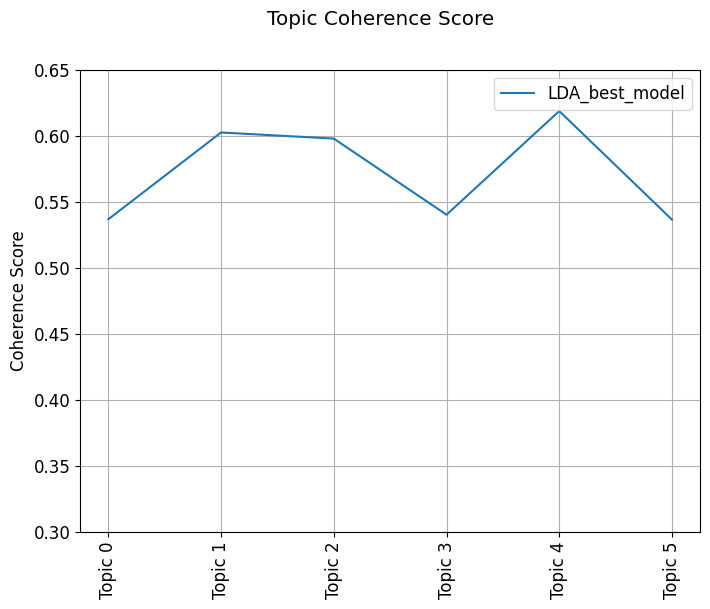

In [ ]:
# Plot graph
topicsname=[]
for i in range(0, num_topics):
    topicsname.append("Topic {0}".format(i))

plt.figure(figsize = (8,6))
plt.rcParams['font.size'] = 12
plt.plot(topicsname, topic_coherence_values, label="LDA_best_model")
plt.suptitle("Topic Coherence Score")
plt.ylabel("Coherence Score")
plt.ylim(0.3, 0.65)
plt.legend(loc='best')
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Print topic coherence scores
for i in range (0, len(topic_coherence_values)):
    tc = topic_coherence_values[i]
    print("Topic", i, ", Coherence Score =", round(tc, 4))

Topic 0 , Coherence Score = 0.5367
Topic 1 , Coherence Score = 0.6024
Topic 2 , Coherence Score = 0.5978
Topic 3 , Coherence Score = 0.5401
Topic 4 , Coherence Score = 0.6186
Topic 5 , Coherence Score = 0.5364


-----

#Eksplorasi tambahan: analisis distribusi probabilitas dari top 100 words pada masing-masing topik (optional)

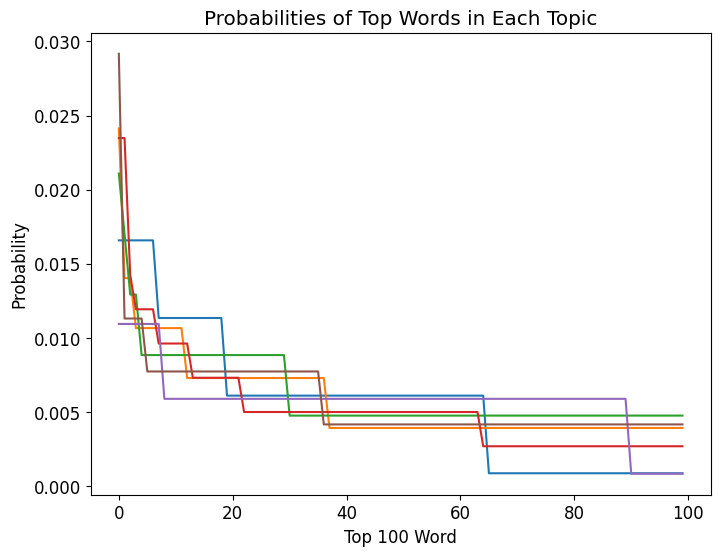

In [ ]:
# The weights of the top 100 words, sorted by size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

# Top 100 words by weight in each topic
top_n_words = 100
topics = select_model_lda_trigram_6.show_topics(num_topics = num_topics, num_words = top_n_words, formatted = False)

for _, infos in topics:
    probs = [prob for _, prob in infos]
    plt.plot(range(top_n_words), probs)

plt.xlabel('Top 100 Word')
plt.ylabel('Probability')
plt.title('Probabilities of Top Words in Each Topic')
plt.show()

Distribusi probabilitas masing-masing topik ditampilkan berupa garis warna. Probabilitas tertinggi terdapat pada top 10 - 20 words pada masing-masing topik, dengan grafik menurun drastis ke bawah. Berarti top 10 - 20 words ini merupakan terms paling dominan pada masing-masing topik.

-----

#Eksplorasi tambahan: cek most representative document pada tiap topik (optional)

In [ ]:
sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
   sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, grp.sort_values(['Contribution'], ascending=[0]).head(1)], axis=0)

sent_topics_sorteddf.reset_index(drop=True, inplace=True)
sent_topics_sorteddf.columns = ['Topic_Number', "Contribution", "Topic_Text_Keywords", "Document_Text_Content"]
sent_topics_sorteddf

,Topic_Number,Contribution,Topic_Text_Keywords,Document_Text_Content
0,0,0.9932,"elektro, seminar, pembicara, kepemimpinan, ganjar_pranowo, hibah, teknik, kemendikbudristek, kerja, penelitian","[prospek, kerja, teknik, elektro, rencana, kariermu, prospek, kerja, teknik, elektro, bidang, manufaktur, ahli, teknik, elektro, sektor, manufaktur, profesional, bertanggung]"
1,1,0.9930,"mahasiswa, studi, juara, mou, seni_rupa, kerja_sama, desain, kabupaten, program, pemerintah","[lulusan, jurusan, psikologi, kerja, prospek, kerja, jurusan, psikologi, peluang, karier, menjanjikan, lulus, psikolog, konselor, peneliti, dosen, pengembang]"
2,2,0.9938,"fakultas, dies_natalis, indonesia, rangkaian, start, perayaan, kedokteran, layoff, wiratha_fest, abdimas","[teknik, industri, pelatihan, metode, kaizen, membantu, mempertahankan, keunggulan, persaingan, dagang, kualitas, produk, tim, pengabdian, masyarakat, pkm, program, sarjana, teknik, industri]"
3,3,0.9946,"mahasiswa, program, sarjana, generasi, akreditasi, teknik, indonesia, wiratha_fest, internasional, batik","[program, magister, psikologi, sains, berhasil, capai, akreditasi, yuspendi, memiliki, target, program, magister, psikologi, sains, mencapai, akreditasi, unggul, akreditasi, internasional, langkah]"
4,4,0.9938,"batik_lasem, indonesia, penghargaan, menerima, sehari, seminar, exposure, kunjungan, pemenang, seoul","[sastra, inggris, pendampingan, penerapan, sepuluh, orang, mahasiswa, janice, arianne, maria, kristina, grisella, kristy, bella, ribka, ariel, kaila, darlene, ferrel, faishal, amrullah]"
5,5,0.9939,"bisnis, fakultas, kuliah, manajemen, dekan, jurusan, bantu, lomba, prospek_kerjanya, alat","[perkuat, keamanan, siber, terima, tanda, sesi, materi, wakil, dekan, bidang, akademik, fakultas, teknologi, informasi, djoni, setiawan, kartawihardja, proses, pembentukan, csirt]"


_____
_____
-----
-----
-----
#SELESAI